### Data downloaded from https://simplemaps.com/data/us-cities

In [109]:
import pandas as pd
import requests
import json 
import numpy as np
import matplotlib.pyplot as pl

In [110]:
import os
import pickle
import geopandas as gpd
from shapely.geometry import Polygon, Point

In [111]:
from cities_utils import get_city_data, distance_between, state_grid, state_polygon, distance_from_cities

### US state grid

In [112]:
CA_grid, CA_polygon = state_grid('California',25) #resolution is 25 miles

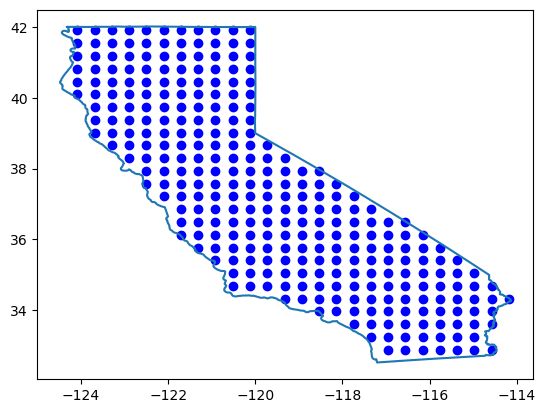

In [113]:
colors = ['blue','red']
pl.plot(*CA_polygon.exterior.xy)
[pl.scatter(p[0],p[1],color='blue') for p in CA_grid]
# [pl.scatter(*p,color='red') for p in invalid_points]



In [114]:
len(CA_grid) #total number of grid points

301

In [115]:
#Threshold
threshold = 99
data_dir = '../data/threshold_'+str(threshold)+'percentile/'
version_number = 1

## Driving distance to cities

In [116]:
city_data_save_file = data_dir + "cities_data_resolution_2_km" # file name to save the city data to

location_file = data_dir + 'ca_data_version_'+str(version_number)+'.csv' # file containing latest locations


In [117]:
state_name = 'California'
city_data = get_city_data()
cities = (city_data[city_data['state_name']==state_name].reset_index(drop=True)).copy(deep=True)
cities.sort_values(by='population',ascending=False,inplace=True)
population_threshold = 80000
cities = cities.loc[cities['population']>population_threshold]

In [118]:
#example of distance function
loc1= (cities.loc[cities['city']=="Santa Barbara"][['lat','lng']]).values[0]
loc2 = (cities.loc[cities['city']=="Burbank"][['lat','lng']]).values[0]
print(loc1,loc2)
distance_between(loc1,loc2)

[  34.4285 -119.7202] [  34.1879 -118.3235]


(146.6678, 109.50333333333333)

In [119]:
cities

,city,state_id,state_name,county_name,lat,lng,population,density
0,Los Angeles,CA,California,Los Angeles,34.1141,-118.4068,12121244,3267.6
1,San Francisco,CA,California,San Francisco,37.7558,-122.4449,3290197,7199.4
2,San Diego,CA,California,San Diego,32.8313,-117.1222,3084174,1675.9
3,Riverside,CA,California,Riverside,33.9381,-117.3949,2022285,1557.0
4,Sacramento,CA,California,Sacramento,38.5677,-121.4685,1924167,1971.3
...,...,...,...,...,...,...,...,...
111,Redwood City,CA,California,San Mateo,37.5025,-122.2253,83905,1687.6
112,Alhambra,CA,California,Los Angeles,34.0840,-118.1355,83174,4275.8
113,Madera,CA,California,Madera,36.9630,-120.0778,82772,1536.8
114,Lakewood,CA,California,Los Angeles,33.8471,-118.1222,82419,3272.3


In [120]:
# generating locations list
loc_data = pd.read_csv(location_file)
locations  = loc_data.loc[loc_data['State']=='CA'][['Latitude','Longitude']].values

# state_name = 'California' # state to focus on
# locations,state_polygon = state_grid(state_name,resolution=25) # change this to change the dataset



In [121]:
len(locations)

5000

In [122]:
df_copy = None

In [127]:
# Generate a dataframe for a list of locations

radii = 50 #in mile

if df_copy is None:  
    df = pd.DataFrame({'lng':[],'lat':[],'number of cities':[],'total population':[],'min distance':[],'max distance':[],'name of the nearest city':[],'coordinates of the nearest city (lat,lng)':[],'distance list':[],'population list':[],'cities name':[],'cities locations':[]})
else:
    df = df_copy.copy(deep=True)
nearest_dist = 0
nearest_city = ''
for i,loc in enumerate(locations[len(df):]):
    #loc[0] is lat and lat[1] is lng
    print(loc)
    # df['drivin radii'].append(radii)
    result = distance_from_cities(loc[0],loc[1],cities)
    if not result:
        df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':0,'total   population':0,'min distance':None,'max distance':None,
            'name of the nearest city':None,
            'coordinates of the nearest city (lat,lng)':None,
            'distance list':[],'population list':[],'cities name':[],'cities locations':[]},ignore_index=True)
    else:
        dist_list, pop_list, name_list, loc_list = result
        city_count = len(dist_list)
        population = np.sum(pop_list)

        if city_count== 0:
            min_distance = None
            max_distance = None
            name_of_the_nearest_city = None
            coordinates = None
        else:
            min_distance = dist_list[0]
            max_distance = dist_list[-1]
            name_of_the_nearest_city = name_list[0]
            coordinates = loc_list[0]

        # print([loc[0],loc[1],radii,city_count,population])

        df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,
        'name of the nearest city':name_of_the_nearest_city,
         'coordinates of the nearest city (lat,lng)':coordinates,
        'distance list':dist_list,'population list':pop_list,'cities name':name_list,'cities locations':loc_list},ignore_index=True)
    
    if (i+1)%100 == 0:
        df_copy = df.copy(deep=True)

[  34.21933086 -115.08778422]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.25843909 -117.4607655 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.82550841 -117.22346737]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.68862961 -117.20189481]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.75314524 -122.5303164 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.89276421 -121.36539832]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.25295876 -116.33899253]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.70818372 -120.45935092]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.86461664 -115.04463911]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.80321413 -116.12326696]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.56034426 -121.96942991]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.19703658 -115.88596883]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.0714914  -121.10652763]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.13563407 -120.02789978]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.75862557 -121.55955133]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.78914034 -114.82891354]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.88454371 -122.57346151]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.88691092 -114.57004285]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.68588944 -117.52548317]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.74455179 -117.09403203]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.90372487 -117.80592641]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.31710143 -114.48375263]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.25843909 -115.64867071]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.13837424 -116.87830646]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.67181566 -115.04463911]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.05741762 -120.67507649]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.83958219 -120.82608439]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.80906742 -122.16358293]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.19703658 -116.03697673]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.16926197 -121.49483366]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.12156029 -114.46218007]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.59085904 -116.20955719]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.64404105 -120.69664905]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.62174677 -121.21439042]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.27251288 -119.98475467]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.53493686 -115.10935678]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.52671636 -120.69664905]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.87009697 -114.57004285]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.49308846 -115.7996786 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.16340868 -116.05854929]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.90372487 -115.19564701]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.06289795 -114.74262331]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.22518415 -121.55955133]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.83098874 -115.51923536]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.26117926 -116.31741997]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.96512737 -117.50391061]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.72773784 -118.43153056]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.09104552 -121.4732611 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.62996726 -117.20189481]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.16652181 -121.7752769 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.56856476 -119.83374677]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.94557326 -117.97850686]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.26117926 -115.88596883]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.73907146 -120.91237462]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.44027941 -123.7815247 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.46531385 -121.12810019]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.33391538 -116.27427486]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.29206699 -116.83516134]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.30614077 -122.59503407]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.92053882 -119.98475467]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.90372487 -117.28818504]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.22207103 -114.6994782 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.54627048 -121.49483366]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.15792835 -117.78435385]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.16066852 -117.28818504]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.50442208 -120.71822161]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.64678121 -117.63334595]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.54353031 -121.96942991]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.36754328 -120.93394718]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.39843102 -122.05572014]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.35894983 -116.01540418]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.02378972 -118.77669147]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.19429642 -121.64584156]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.08245206 -117.48233805]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.11607996 -119.94160955]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.35072933 -120.15733512]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.67766895 -120.86922951]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.69136977 -118.04322454]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.58811887 -116.29584742]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.01008889 -121.49483366]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.87046993 -122.09886526]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.08245206 -115.06621167]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.10200618 -117.4607655 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.15792835 -117.91378919]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.43716628 -118.47467568]
b'{"message":"Impossible route between points","code":"NoRoute"}'
[  35.94009293 -119.920037  ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':0,'total   population':0,'min distance':None,'max distance':None,
/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.16652181 -123.17749311]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.26703255 -121.14967275]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.91779865 -120.20048024]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.38435723 -121.60269644]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.19977675 -114.91520377]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.65226154 -115.32508235]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.27525304 -120.28677047]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.76958623 -115.15250189]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.88417075 -116.705726  ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.09926601 -120.32991558]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.04919712 -122.96176754]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.75003212 -114.78576842]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.40939168 -120.30834302]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.1747423  -116.29584742]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.60767299 -117.74120874]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.28073337 -114.87205865]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.01556922 -120.86922951]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.12741358 -121.94785736]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.52945653 -115.99383162]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.64404105 -120.80451183]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.16378164 -122.5303164 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.41761217 -117.13717714]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.89276421 -122.96176754]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.00697577 -115.88596883]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.56856476 -119.94160955]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.33939571 -114.74262331]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.48486797 -121.90471224]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.69996323 -121.7752769 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.80047396 -121.34382576]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.50990241 -117.13717714]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.65226154 -116.16641207]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.48760813 -120.13576257]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.80595429 -117.39604782]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.00734873 -122.42245361]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.64952138 -117.89221664]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.26977271 -120.50249604]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.94283309 -115.32508235]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.26155222 -122.76761452]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.12741358 -121.75370434]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.05741762 -121.55955133]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.23888498 -114.76419587]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.71092389 -117.93536175]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.49346142 -122.55188895]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.39531789 -116.66258089]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.40117118 -121.7752769 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.93187244 -122.24987316]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.57715821 -122.03414759]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.98505445 -123.41479123]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.81454775 -121.02023741]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.72773784 -115.30350979]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.78914034 -114.72105075]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.40939168 -116.68415344]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.14696769 -121.4732611 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.01830939 -117.24503993]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.94557326 -114.74262331]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.76684607 -117.50391061]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.12156029 -116.29584742]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.7641059  -120.56721371]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.10200618 -115.43294514]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.81180758 -123.13434799]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.7641059  -120.61035882]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.82002808 -120.67507649]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.56582459 -117.18032225]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.92327898 -116.38213764]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.56856476 -117.33133015]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.44849991 -117.43919294]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.96512737 -120.09261745]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.85913631 -120.30834302]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.88965108 -115.32508235]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.34250884 -121.12810019]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.76684607 -117.28818504]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.43716628 -115.19564701]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.6944829  -121.75370434]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.09378568 -120.28677047]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.59945249 -122.78918708]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.58537871 -120.71822161]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.19977675 -114.6994782 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.94009293 -116.87830646]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.06601107 -122.18515548]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.93735277 -120.52406859]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.70855668 -122.55188895]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.99327494 -121.66741412]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.60767299 -117.39604782]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.72225751 -121.73213179]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.42620563 -121.40854343]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.55486393 -122.33616338]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.65226154 -117.33133015]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.64952138 -116.36056509]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.68862961 -114.76419587]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.2779932  -115.30350979]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.83098874 -118.43153056]
b'{"message":"Impossible route between points","code":"NoRoute"}'
[  36.93735277 -119.85531933]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':0,'total   population':0,'min distance':None,'max distance':None,
/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.52123603 -121.30068065]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.75314524 -121.58112389]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.14970786 -122.20672804]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.14385457 -115.23879212]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.33976867 -121.90471224]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.52123603 -120.82608439]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.09652585 -119.96318211]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.31710143 -114.91520377]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.05741762 -116.74887111]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.14696769 -123.22063822]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.88417075 -115.92911395]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.52671636 -117.22346737]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.3116211  -120.39463325]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.79225347 -122.48717128]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.96238721 -117.28818504]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.44575974 -120.89080206]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.30066045 -123.35007356]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.95416672 -122.33616338]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.42346546 -120.89080206]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.40117118 -122.48717128]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.80321413 -116.08012185]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.02104955 -118.15108732]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.68314928 -119.83374677]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.44849991 -119.96318211]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.13837424 -117.97850686]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.89824454 -121.81842202]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.94557326 -115.04463911]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.16652181 -122.89704987]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.41213184 -115.30350979]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.9092052  -114.74262331]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.63582055 -122.44402617]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.07423157 -121.25753553]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.98194132 -117.52548317]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.23614481 -116.20955719]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.40391135 -120.91237462]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.12156029 -117.63334595]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.43168596 -116.16641207]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.04334383 -115.43294514]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.51849587 -121.68898667]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.3116211  -120.15733512]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.22207103 -117.05088691]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.62996726 -120.20048024]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.41487201 -116.59786321]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.9009847 -116.4037102]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.94283309 -117.82749897]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.1051193 -122.5303164]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.76958623 -114.80734098]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.28110633 -122.74604197]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.97920116 -119.85531933]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.17748247 -116.68415344]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.20251691 -115.58395303]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.11882012 -119.920037  ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.10474634 -115.41137258]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.76684607 -117.78435385]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.9346126  -121.02023741]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.43442612 -115.99383162]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.4821278  -121.23596298]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.90646503 -116.23112975]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.74729195 -120.11419001]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.47627451 -117.22346737]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.97646099 -120.11419001]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.75314524 -123.24221078]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.64678121 -120.50249604]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.69136977 -117.80592641]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.66907549 -116.14483952]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.92327898 -117.97850686]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.78640018 -117.69806362]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.63582055 -123.63051681]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.28073337 -114.97992144]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.10200618 -118.66882869]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.72773784 -117.65491851]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.99053478 -121.83999457]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.88965108 -115.92911395]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.98742165 -116.92145157]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.63270743 -115.73496093]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.86187647 -116.01540418]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.90957816 -122.05572014]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.14970786 -121.96942991]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.57404509 -115.90754139]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.54627048 -116.81358879]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.20251691 -116.05854929]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.57404509 -116.20955719]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.88143059 -116.74887111]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.57441805 -123.88938749]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.83958219 -121.4732611 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.1747423  -121.58112389]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.19977675 -116.08012185]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.6272271  -118.73354636]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.31436127 -119.83374677]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.21385053 -116.38213764]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.41761217 -116.81358879]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.92327898 -116.33899253]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.64130088 -120.97709229]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.75314524 -122.05572014]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.85913631 -121.68898667]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.66633533 -115.99383162]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.60493282 -121.49483366]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.5935992  -117.24503993]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.18022263 -117.18032225]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.2165907  -119.89846444]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.58811887 -116.79201623]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.01556922 -117.37447527]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.85639614 -120.95551973]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.80595429 -114.87205865]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.61900661 -121.94785736]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.8673568  -114.95834888]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.32569489 -122.42245361]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.04645696 -123.52265402]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.57130492 -118.02165198]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.81143462 -117.26661248]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.82002808 -120.20048024]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.046084   -117.20189481]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.87009697 -114.93677632]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.0042356  -117.87064408]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.31710143 -116.33899253]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.10785947 -121.94785736]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.80321413 -117.65491851]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.05193729 -121.38697087]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.13837424 -118.10794221]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.49582863 -114.80734098]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.046084   -115.56238048]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.47938764 -122.12043781]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.75862557 -122.16358293]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.70270339 -120.63193138]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.39531789 -115.51923536]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.52671636 -120.30834302]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.57130492 -114.63476053]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.87046993 -122.61660662]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.78366001 -120.73979416]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.75588541 -122.31459083]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.16066852 -118.53939335]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.75314524 -122.18515548]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.23614481 -118.58253846]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.79499363 -122.03414759]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.33976867 -122.61660662]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.04334383 -115.62709815]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.2502186  -121.79684946]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.80321413 -120.86922951]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.65226154 -114.57004285]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.69136977 -117.82749897]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.30066045 -121.88313969]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.11059963 -122.27144571]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.42346546 -122.33616338]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.56034426 -122.05572014]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.4821278  -121.90471224]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.18881609 -121.12810019]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.92327898 -116.96459668]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.72225751 -120.71822161]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.33665555 -115.71338838]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.39805806 -115.77810605]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.63270743 -115.02306655]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.59945249 -121.99100247]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.6272271  -117.59020084]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.30888094 -120.09261745]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.00697577 -115.43294514]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.06601107 -122.57346151]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.45124007 -120.17890768]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.41213184 -120.48092348]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.88691092 -116.59786321]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.1411144  -118.38838545]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.84232236 -120.97709229]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.93735277 -120.02789978]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.16652181 -121.79684946]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.03238317 -121.27910809]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.01830939 -116.12326696]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.06015778 -120.52406859]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.47664747 -122.44402617]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.18022263 -118.15108732]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.68588944 -117.26661248]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.48760813 -121.21439042]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.92875931 -115.00149399]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.35072933 -119.85531933]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.92327898 -118.19423243]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.80869446 -114.95834888]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.06015778 -116.705726  ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.80321413 -120.52406859]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.82824857 -115.19564701]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.70270339 -116.96459668]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.82824857 -116.31741997]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.81728791 -121.08495508]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.40391135 -122.20672804]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.61352628 -124.21297584]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.68314928 -120.09261745]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.56582459 -120.24362535]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.94283309 -117.26661248]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.76958623 -114.78576842]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.98468149 -114.5484703 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.69136977 -116.16641207]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.72499767 -118.43153056]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.27251288 -116.89987901]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.79188051 -116.72729856]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.20251691 -115.56238048]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.68588944 -116.79201623]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.62996726 -116.2527023 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.99053478 -123.56579913]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.2083702  -120.82608439]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.31710143 -115.28193724]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.55212377 -122.48717128]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.25569893 -120.00632722]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.63856072 -121.90471224]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.04919712 -121.3222532 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.61352628 -122.20672804]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.84506252 -117.76278129]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.33391538 -117.41762038]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.61041315 -117.33133015]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.53219669 -118.08636965]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.39843102 -121.83999457]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.67181566 -114.91520377]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.28932682 -122.27144571]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.40939168 -120.02789978]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.18333576 -122.12043781]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.24747843 -121.36539832]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.94557326 -114.80734098]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.62174677 -120.28677047]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.37302361 -120.73979416]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.43168596 -116.79201623]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.30028748 -116.01540418]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.63270743 -117.3097576 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.69410994 -116.64100833]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.06289795 -117.35290271]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.31436127 -117.41762038]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.92601915 -115.54080792]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.76958623 -116.83516134]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.16340868 -115.62709815]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.33117522 -116.38213764]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.00697577 -115.17407445]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.99601511 -120.97709229]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.37028345 -117.35290271]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.08245206 -117.76278129]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.2502186  -121.81842202]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.06015778 -116.4037102 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.21933086 -118.64725613]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.72773784 -117.63334595]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.22518415 -122.63817918]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.62996726 -117.97850686]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.19155625 -121.71055923]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.16378164 -122.78918708]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.12156029 -117.6117734 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.14970786 -122.16358293]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.63270743 -117.33133015]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.75003212 -117.91378919]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.4821278  -121.99100247]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.13837424 -116.08012185]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.29206699 -121.45168855]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.67181566 -115.62709815]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.69410994 -116.87830646]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.06563811 -117.07245947]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.82276824 -117.41762038]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.3198416  -115.99383162]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.26155222 -122.31459083]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.22518415 -122.40088105]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.8673568  -115.41137258]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.91505849 -121.60269644]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.31436127 -118.06479709]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.65226154 -115.99383162]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.94283309 -116.96459668]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.84506252 -116.31741997]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.40665151 -122.42245361]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.76684607 -120.09261745]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.60219266 -121.23596298]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.05741762 -120.20048024]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.23888498 -114.82891354]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.0797119  -117.26661248]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.19429642 -120.99866485]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.47353435 -115.67024326]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.73321817 -115.02306655]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.92327898 -120.13576257]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.71951734 -122.46559873]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.74729195 -114.63476053]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.9009847  -117.74120874]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.06015778 -117.50391061]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.01556922 -119.920037  ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.83958219 -117.89221664]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.52671636 -121.4732611 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.86461664 -115.90754139]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.79188051 -115.51923536]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.01008889 -122.09886526]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.78914034 -117.33133015]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.45983353 -122.09886526]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.56034426 -121.30068065]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.90372487 -120.56721371]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.92327898 -117.54705572]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.45398023 -115.86439628]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.28658666 -122.6813243 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.27251288 -121.06338252]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.92601915 -114.65633308]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.71677718 -121.81842202]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.39531789 -115.10935678]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.49308846 -120.48092348]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.02652988 -114.6994782 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.02378972 -117.89221664]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.90372487 -116.98616924]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.71951734 -122.40088105]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.82550841 -115.88596883]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.64952138 -115.45451769]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.95964704 -116.8567339 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.41487201 -114.52689774]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.39805806 -115.34665491]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.81728791 -121.96942991]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.11059963 -121.30068065]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.41213184 -120.24362535]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.05467745 -120.67507649]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.2502186  -121.12810019]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.02652988 -115.34665491]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.71951734 -121.83999457]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.44301958 -121.49483366]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.04919712 -121.55955133]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.53493686 -115.9506865 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.88143059 -120.48092348]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.99053478 -121.99100247]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.49308846 -115.28193724]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.41213184 -116.08012185]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.57130492 -117.24503993]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.71677718 -122.14201037]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.61315331 -117.82749897]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.49346142 -122.87547731]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.46805402 -119.89846444]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.69136977 -114.65633308]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.80595429 -116.42528276]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.28658666 -120.69664905]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.01830939 -120.24362535]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.2779932  -115.51923536]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.85639614 -121.45168855]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.42346546 -121.08495508]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.82276824 -115.71338838]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.4903483  -117.48233805]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.41761217 -114.6994782 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.52671636 -121.25753553]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.89276421 -121.58112389]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.18607592 -121.40854343]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.47353435 -115.73496093]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.69722306 -120.99866485]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.52945653 -115.30350979]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.43753925 -122.27144571]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.47938764 -121.88313969]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.81728791 -121.10652763]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.09652585 -117.28818504]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.65500171 -116.51157299]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.94009293 -116.53314554]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.66907549 -116.1016944 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.4567204  -117.07245947]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.0042356 -117.0077418]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.29206699 -119.94160955]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.0797119  -115.60552559]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.47079418 -120.26519791]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.68588944 -115.58395303]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.57678525 -116.94302413]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.37576378 -118.409958  ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.83098874 -117.02931436]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.9092052 -116.2527023]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.08282502 -122.70289685]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.08830535 -122.29301827]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.43442612 -114.82891354]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.64989434 -122.91862242]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.85054285 -114.87205865]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.1051193  -121.79684946]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.33391538 -116.5547181 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.8673568  -115.49766281]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.11882012 -114.91520377]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.48760813 -120.17890768]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.94831342 -116.8567339 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.63308039 -124.25612096]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.28073337 -115.97225906]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.24162514 -116.18798463]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.2165907  -114.93677632]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.47627451 -117.54705572]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.95690688 -121.36539832]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.57130492 -115.82125116]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.47079418 -116.16641207]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.62448693 -117.18032225]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.23066448 -120.11419001]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.46257369 -120.89080206]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.04060367 -114.87205865]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.97920116 -119.87689188]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.64130088 -120.48092348]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.10474634 -116.2527023 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.00697577 -115.62709815]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.35894983 -118.38838545]
b'{"message":"Impossible route between points","code":"NoRoute"}'
[  39.20563004 -123.13434799]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':0,'total   population':0,'min distance':None,'max distance':None,
/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.3534695  -119.98475467]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.4821278  -122.72446941]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.9092052  -115.54080792]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.80047396 -121.40854343]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.89002404 -123.43636379]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.35932279 -124.34241119]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.76684607 -117.33133015]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.56034426 -121.3222532 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.17200214 -120.69664905]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.40117118 -121.75370434]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.13015374 -121.04180996]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.4821278  -121.83999457]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.71677718 -120.95551973]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.89824454 -117.28818504]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.40939168 -117.48233805]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.78640018 -116.49000043]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.27251288 -120.50249604]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.56856476 -120.41620581]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.01556922 -120.15733512]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.94283309 -116.89987901]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.94868639 -122.42245361]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.59085904 -117.50391061]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.72225751 -120.56721371]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.00697577 -114.6994782 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.90646503 -116.4037102 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.80047396 -120.35148814]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.26703255 -122.40088105]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.41761217 -116.33899253]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.47664747 -123.13434799]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.2838465  -121.96942991]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.02104955 -117.24503993]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.88965108 -115.04463911]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.61589348 -116.64100833]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.59633936 -116.64100833]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.97920116 -120.17890768]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.86461664 -118.43153056]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.64952138 -120.32991558]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.60493282 -121.7752769 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.77232639 -115.54080792]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.61315331 -115.62709815]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.06601107 -122.16358293]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.74729195 -116.31741997]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.18607592 -121.86156713]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.39843102 -122.55188895]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.97098066 -121.45168855]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.29480715 -115.90754139]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.85365598 -121.99100247]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.97920116 -116.12326696]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.96276017 -123.97567772]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.7641059  -117.22346737]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.47664747 -122.35773594]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.8313617  -122.63817918]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.046084   -115.67024326]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.1411144  -115.88596883]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.94283309 -116.49000043]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.68588944 -120.30834302]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.20563004 -121.68898667]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.82276824 -120.0710449 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.5239762  -120.80451183]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.93187244 -121.90471224]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.10785947 -122.20672804]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.84232236 -116.59786321]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.21385053 -120.39463325]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.88417075 -115.21721957]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.39531789 -116.16641207]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.65811483 -122.14201037]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.82550841 -117.59020084]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.09652585 -120.71822161]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.02652988 -115.15250189]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.86461664 -114.87205865]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.6526345  -122.05572014]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.51538274 -115.43294514]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.51264258 -118.36681289]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.81728791 -122.03414759]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.68040911 -120.48092348]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.52945653 -117.11560458]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.37576378 -114.57004285]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.63856072 -122.81075964]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.73633129 -122.46559873]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.65811483 -121.66741412]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.54901064 -117.26661248]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.17200214 -119.85531933]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.02104955 -114.89363121]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.05467745 -121.25753553]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.79188051 -117.09403203]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.13289391 -117.52548317]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.42894579 -120.78293928]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.96238721 -115.13092934]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.68040911 -121.68898667]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.12156029 -114.97992144]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.5935992  -117.80592641]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.39257773 -120.84765695]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.78366001 -120.63193138]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.04334383 -118.47467568]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.79225347 -121.81842202]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.51264258 -114.78576842]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.55449097 -114.87205865]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.12430045 -114.76419587]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.38983756 -120.20048024]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.85054285 -116.03697673]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.33391538 -116.92145157]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.47627451 -117.18032225]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.41798513 -122.01257503]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.89550437 -122.50874384]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.26703255 -120.65350394]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.64678121 -116.42528276]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.35894983 -115.47609025]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.72499767 -120.39463325]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.76958623 -117.43919294]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.06563811 -115.15250189]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.53493686 -114.78576842]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.58811887 -120.58878626]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.19703658 -120.32991558]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.92327898 -116.5547181 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.76958623 -116.2527023 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.06015778 -115.67024326]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.78091985 -119.94160955]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.19977675 -115.92911395]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.98468149 -117.56862828]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.345249   -123.04805777]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.82276824 -118.77669147]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.18881609 -121.30068065]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.29480715 -116.44685532]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.4821278  -122.05572014]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.39531789 -118.79826403]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.0378635  -116.31741997]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.74455179 -117.48233805]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.75003212 -117.18032225]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.76684607 -116.36056509]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.92327898 -117.43919294]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.01556922 -120.26519791]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.69996323 -120.76136672]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.660855   -120.30834302]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.97920116 -116.4037102 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.02964301 -121.99100247]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.63270743 -115.82125116]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.53219669 -118.02165198]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.71366405 -115.88596883]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.40391135 -121.02023741]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.65537467 -121.71055923]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.30028748 -116.14483952]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.68588944 -120.52406859]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.94283309 -116.03697673]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.53256965 -122.91862242]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.50990241 -121.02023741]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.1133398  -120.84765695]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.31436127 -117.95693431]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.82002808 -120.93394718]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.80047396 -120.30834302]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.90646503 -118.08636965]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.046084   -115.21721957]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.72225751 -117.76278129]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.52123603 -122.03414759]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.12156029 -117.33133015]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.39531789 -115.13092934]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.3116211 -121.3222532]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.83958219 -120.24362535]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.80595429 -118.10794221]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.13837424 -116.16641207]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.5935992 -117.6117734]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.82276824 -120.50249604]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.15244802 -121.53797877]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.19703658 -119.83374677]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.06015778 -117.20189481]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.89550437 -122.01257503]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.21933086 -118.38838545]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.7641059  -116.49000043]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.19703658 -117.56862828]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.10785947 -122.12043781]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.83410186 -123.32850101]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.85365598 -122.42245361]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.21385053 -120.82608439]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.65811483 -121.43011599]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.11882012 -118.79826403]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.66907549 -117.89221664]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.71951734 -120.65350394]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.83410186 -123.26378334]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.43753925 -123.97567772]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.96512737 -115.17407445]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.64952138 -115.71338838]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.94009293 -120.0710449 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.37302361 -115.88596883]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.95964704 -121.04180996]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.40665151 -120.58878626]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.16066852 -118.19423243]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.68040911 -120.37306069]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.12467342 -121.9262848 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.06289795 -118.04322454]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.09652585 -121.34382576]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.61041315 -118.08636965]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.50990241 -115.41137258]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.23888498 -118.38838545]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.82550841 -115.47609025]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.06875124 -123.69523448]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.59085904 -115.84282372]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.94283309 -117.20189481]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.87595026 -120.76136672]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.9009847  -119.94160955]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.86187647 -116.72729856]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.71366405 -116.03697673]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.21933086 -118.23737755]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.13563407 -119.94160955]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.59945249 -121.36539832]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.80869446 -115.30350979]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.4903483  -116.01540418]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.45124007 -117.3097576 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.14970786 -121.19281786]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.76958623 -114.87205865]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.15518819 -116.8567339 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.56856476 -115.38980002]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.51538274 -116.96459668]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.4903483  -120.15733512]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.4567204  -115.41137258]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.55175081 -117.35290271]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.31436127 -116.12326696]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.8313617  -122.46559873]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.24162514 -117.26661248]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.76684607 -116.96459668]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.67181566 -116.20955719]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.75277228 -116.08012185]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.54627048 -121.25753553]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.55449097 -114.78576842]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.71092389 -116.03697673]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.1133398  -120.09261745]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.3198416  -115.32508235]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.44027941 -122.48717128]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.26155222 -123.32850101]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.90957816 -122.46559873]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.26429238 -121.83999457]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.77232639 -114.57004285]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.7977338  -122.16358293]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.88965108 -116.87830646]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.67181566 -114.80734098]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.02104955 -116.23112975]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.70270339 -117.13717714]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.80632726 -122.40088105]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.61626644 -123.30692845]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.98468149 -117.24503993]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.13837424 -116.66258089]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.29754732 -115.88596883]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.20251691 -115.10935678]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.92053882 -120.76136672]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.10785947 -122.72446941]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.83684203 -120.71822161]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.27525304 -116.42528276]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.33939571 -117.26661248]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.12430045 -117.09403203]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.06015778 -117.48233805]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.57130492 -116.49000043]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.26703255 -121.51640622]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.00149544 -118.69040125]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.74181162 -121.40854343]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.60493282 -117.05088691]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.67492878 -122.24987316]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.49582863 -114.76419587]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.16340868 -117.05088691]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.19155625 -121.73213179]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.80869446 -117.67649107]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.66907549 -119.96318211]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.99601511 -120.50249604]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.33665555 -115.9506865 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.41213184 -118.75511892]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.74455179 -117.11560458]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.76136574 -120.58878626]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.28932682 -121.60269644]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.01282906 -122.65975174]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.21385053 -116.8567339 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.65226154 -116.96459668]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.16378164 -122.48717128]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.96512737 -115.97225906]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.63582055 -122.48717128]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.9009847  -120.65350394]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.43716628 -117.09403203]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.81728791 -120.73979416]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.61315331 -115.43294514]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.60767299 -117.69806362]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.11059963 -122.55188895]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.38983756 -116.92145157]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.06289795 -115.00149399]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.12156029 -114.57004285]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.51538274 -114.72105075]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.55449097 -116.27427486]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.0042356  -114.76419587]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.84232236 -120.41620581]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.06289795 -118.64725613]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.00149544 -117.63334595]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.80321413 -120.95551973]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.94283309 -115.97225906]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.92601915 -117.11560458]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.7641059  -119.96318211]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.9346126 -122.2283006]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.88417075 -116.57629066]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.29206699 -120.0710449 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.35932279 -122.59503407]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.81454775 -121.99100247]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.96238721 -120.32991558]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.94831342 -118.53939335]
b'{"message":"Impossible route between points","code":"NoRoute"}'
[  33.41761217 -114.65633308]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':0,'total   population':0,'min distance':None,'max distance':None,
/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.84506252 -116.61943577]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.04334383 -114.59161541]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.42894579 -121.30068065]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.25843909 -114.33274473]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.26117926 -114.95834888]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.73359113 -121.9262848 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.10474634 -115.62709815]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.97920116 -115.99383162]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.38161707 -122.96176754]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.87046993 -121.75370434]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.60767299 -116.46842787]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.88417075 -115.88596883]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.35620966 -118.64725613]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.09652585 -119.94160955]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.70818372 -120.37306069]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.62996726 -115.38980002]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.3870974  -121.45168855]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.05467745 -119.96318211]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.01556922 -121.49483366]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.30028748 -116.38213764]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.22207103 -115.34665491]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.43168596 -116.74887111]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.08245206 -117.05088691]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.01556922 -120.50249604]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.23066448 -121.68898667]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.86187647 -121.19281786]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.75277228 -115.64867071]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.66907549 -115.28193724]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.19429642 -121.12810019]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.24162514 -116.08012185]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.41761217 -115.67024326]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.93735277 -121.02023741]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.57715821 -122.35773594]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.06289795 -117.84907152]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.25843909 -114.87205865]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.17200214 -120.73979416]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.81454775 -121.55955133]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.55175081 -118.64725613]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.78091985 -120.82608439]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.51849587 -121.73213179]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.61626644 -121.81842202]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.84232236 -117.65491851]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.56582459 -120.04947234]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.25295876 -120.45935092]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.40665151 -121.08495508]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.0797119  -114.80734098]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.61900661 -121.21439042]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.16066852 -114.3974624 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.2419981  -122.65975174]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.71366405 -115.47609025]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.51849587 -122.31459083]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.44849991 -120.26519791]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.96786754 -114.6994782 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.86461664 -116.03697673]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.28658666 -120.93394718]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.64952138 -120.35148814]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.49582863 -116.08012185]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.30888094 -121.64584156]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.44575974 -120.39463325]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.3116211  -116.89987901]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.02378972 -114.74262331]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.31710143 -115.19564701]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.0042356  -117.35290271]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.04060367 -114.89363121]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.46805402 -120.95551973]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.57989838 -122.81075964]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.42620563 -121.66741412]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.88417075 -115.15250189]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.17200214 -117.54705572]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.71951734 -121.96942991]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.36480312 -122.29301827]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.63270743 -115.06621167]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.85054285 -114.59161541]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.76136574 -117.22346737]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.80595429 -118.06479709]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.82824857 -115.06621167]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.88691092 -115.82125116]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.06015778 -116.27427486]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.85091581 -121.81842202]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.05467745 -119.98475467]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.19429642 -120.09261745]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.79188051 -114.65633308]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.56582459 -120.99866485]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.65811483 -122.72446941]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.25569893 -116.18798463]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.57715821 -122.48717128]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.80321413 -118.79826403]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.90646503 -115.64867071]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.06327091 -122.70289685]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.84780269 -118.12951476]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.3534695  -118.00007942]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.54901064 -117.37447527]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.31436127 -115.92911395]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.82276824 -120.61035882]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.35620966 -115.84282372]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.06563811 -116.42528276]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.3116211  -116.83516134]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.98468149 -114.91520377]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.92327898 -116.1016944 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.36754328 -120.89080206]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.04919712 -123.35007356]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.06601107 -121.83999457]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.88691092 -117.05088691]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.47390731 -122.8323322 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.32021456 -121.9262848 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.71951734 -120.20048024]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.14385457 -116.20955719]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.76136574 -117.11560458]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.72499767 -119.96318211]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.87009697 -116.94302413]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.12430045 -116.74887111]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.13563407 -120.13576257]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.37850394 -115.32508235]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.0797119  -116.23112975]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.12430045 -115.23879212]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.09652585 -119.83374677]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.046084   -116.83516134]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.96238721 -115.62709815]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.08519223 -115.69181582]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.5157557  -124.14825817]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.10474634 -114.80734098]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.79499363 -121.9262848 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.00697577 -115.45451769]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.3116211  -116.44685532]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.89824454 -120.30834302]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.13563407 -120.26519791]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.08830535 -121.14967275]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.89824454 -120.78293928]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.57404509 -114.5484703 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.4821278  -121.10652763]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.85054285 -114.72105075]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.00697577 -116.81358879]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.82276824 -116.12326696]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.41761217 -116.08012185]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.7641059  -116.27427486]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.69136977 -116.2527023 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.83410186 -122.8323322 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.730478   -118.32366778]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.66633533 -120.20048024]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.92053882 -116.49000043]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.18022263 -115.36822746]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.89824454 -120.65350394]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.64952138 -118.23737755]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.1747423  -120.65350394]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.35620966 -116.49000043]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.41761217 -116.51157299]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.69996323 -120.84765695]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.49894175 -121.88313969]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.38435723 -120.95551973]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.5239762  -121.12810019]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.12156029 -117.20189481]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.49894175 -122.35773594]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.58263854 -120.82608439]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.81728791 -121.66741412]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.68862961 -115.21721957]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.24162514 -117.07245947]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.30888094 -120.80451183]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.11059963 -121.12810019]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.22792432 -122.33616338]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.88965108 -118.47467568]
b'{"message":"Impossible route between points","code":"NoRoute"}'
[  33.96512737 -117.09403203]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':0,'total   population':0,'min distance':None,'max distance':None,
/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.00697577 -115.30350979]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.43442612 -115.19564701]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.23340465 -120.35148814]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.08519223 -115.49766281]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.17748247 -115.9506865 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.88417075 -115.41137258]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.29480715 -119.83374677]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.72773784 -115.99383162]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.30888094 -120.48092348]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.50168192 -121.71055923]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.59945249 -121.34382576]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.62448693 -121.4732611 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.16652181 -122.94019498]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.96512737 -120.11419001]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.62448693 -117.20189481]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.84232236 -116.92145157]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.50442208 -121.96942991]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.13837424 -116.68415344]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.71092389 -115.43294514]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.64952138 -115.54080792]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.40391135 -121.23596298]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.42346546 -121.3222532 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.72773784 -120.15733512]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.4903483  -120.84765695]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.71951734 -120.67507649]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.4567204  -115.82125116]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.78677314 -123.39321868]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.06015778 -116.83516134]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.12467342 -122.50874384]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.77817969 -121.23596298]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.33665555 -116.05854929]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.86187647 -120.48092348]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.13015374 -121.08495508]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.28932682 -121.06338252]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.85365598 -121.43011599]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.90646503 -117.1587497 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.63856072 -122.70289685]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.7281108  -122.57346151]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.66907549 -120.37306069]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.58537871 -121.49483366]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.33391538 -120.13576257]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.33117522 -121.30068065]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.94009293 -117.71963618]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.63856072 -122.76761452]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.37028345 -121.04180996]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.47079418 -120.11419001]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.30066045 -121.9262848 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.11059963 -120.41620581]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.28110633 -122.35773594]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.44027941 -122.2283006 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.51264258 -118.5609659 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.58811887 -120.00632722]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.06015778 -117.89221664]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.90957816 -121.73213179]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.33391538 -120.17890768]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.84506252 -117.50391061]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.85365598 -121.9262848 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.04060367 -116.68415344]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.86461664 -114.65633308]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.24747843 -122.87547731]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.41487201 -115.97225906]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.68862961 -118.25895011]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.92875931 -114.65633308]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.67181566 -115.58395303]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.68862961 -119.98475467]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.37028345 -121.3222532 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.74181162 -117.22346737]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.08556519 -122.01257503]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.78366001 -116.49000043]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.73321817 -117.02931436]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.42620563 -121.14967275]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.16926197 -121.60269644]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.37850394 -115.02306655]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.44301958 -120.73979416]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.21385053 -117.41762038]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.49582863 -114.93677632]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.30028748 -115.51923536]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.57441805 -122.14201037]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.96512737 -116.98616924]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.71092389 -117.11560458]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.28932682 -120.15733512]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.19703658 -116.05854929]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.43168596 -120.54564115]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.39531789 -114.59161541]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.50442208 -120.95551973]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.68588944 -117.74120874]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.86461664 -115.36822746]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.47079418 -117.4607655 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.83098874 -114.61318797]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.49582863 -115.86439628]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.50168192 -122.24987316]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.88691092 -115.73496093]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.2165907  -115.92911395]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.05193729 -121.73213179]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.96512737 -116.49000043]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.56582459 -119.83374677]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.33939571 -116.03697673]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.06015778 -118.08636965]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.28073337 -115.21721957]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.00697577 -115.67024326]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.43442612 -115.21721957]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.74455179 -120.0710449 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.43753925 -122.09886526]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.39843102 -122.61660662]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.0378635  -119.96318211]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.10785947 -121.36539832]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.02652988 -114.74262331]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.50442208 -121.51640622]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.7977338  -120.78293928]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.68588944 -116.74887111]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.046084   -115.32508235]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.51264258 -120.04947234]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.6272271  -117.37447527]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.50716225 -120.26519791]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.50442208 -122.29301827]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.42346546 -121.53797877]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.84780269 -118.10794221]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.61041315 -117.97850686]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.91505849 -120.54564115]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.90372487 -120.11419001]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.61315331 -114.61318797]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.15518819 -120.65350394]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.95142655 -122.29301827]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.10200618 -115.7996786 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.730478   -114.63476053]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.95690688 -117.33133015]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.56308443 -120.26519791]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.78914034 -117.69806362]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.81180758 -121.96942991]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.00149544 -118.25895011]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.15244802 -120.30834302]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.01830939 -120.32991558]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.28073337 -116.08012185]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.32021456 -122.85390475]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.47627451 -115.38980002]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.81143462 -116.8567339 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.87595026 -120.69664905]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.91779865 -121.55955133]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.64678121 -116.51157299]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.81728791 -120.89080206]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.80595429 -118.45310312]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.24473827 -121.4732611 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.16926197 -121.1712453 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.14385457 -115.97225906]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.41487201 -115.13092934]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.88691092 -115.38980002]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.26703255 -121.25753553]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.58537871 -117.13717714]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.5935992  -115.15250189]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.77232639 -115.92911395]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.83098874 -117.26661248]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.13837424 -116.2527023 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.16340868 -116.98616924]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.68040911 -120.93394718]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.16378164 -122.01257503]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.23340465 -121.21439042]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.49582863 -116.53314554]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.92913227 -122.24987316]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.95964704 -116.83516134]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.73633129 -121.27910809]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.29480715 -117.07245947]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.66359516 -121.75370434]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.03512334 -120.13576257]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.0797119  -115.58395303]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.47079418 -120.30834302]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.07423157 -120.04947234]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.86461664 -114.95834888]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.00149544 -115.67024326]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.94009293 -121.27910809]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.68588944 -121.10652763]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.63034023 -122.89704987]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.63856072 -123.17749311]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.57989838 -121.86156713]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.1133398  -121.08495508]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.9346126  -121.79684946]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.98742165 -115.08778422]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.3198416  -115.56238048]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.45398023 -114.87205865]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.88691092 -115.86439628]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.41487201 -118.5609659 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.61352628 -123.45793635]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.3870974 -122.2283006]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.26429238 -122.14201037]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.61315331 -114.78576842]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.5157557  -123.73837959]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.82002808 -120.63193138]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.76958623 -115.69181582]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.69174273 -122.81075964]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.80595429 -116.57629066]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.18022263 -118.12951476]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.0797119  -116.87830646]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.88417075 -117.02931436]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.59945249 -121.02023741]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.56308443 -122.3793085 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.74455179 -116.29584742]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.96512737 -117.0077418 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.66907549 -118.08636965]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.2838465  -121.71055923]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.58263854 -121.7752769 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.40391135 -122.87547731]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.7641059  -116.59786321]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.67181566 -117.93536175]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.77232639 -116.23112975]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.95142655 -123.28535589]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.38435723 -121.08495508]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.97920116 -121.06338252]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.61041315 -117.39604782]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.68040911 -120.0710449 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.61626644 -121.96942991]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.78914034 -118.23737755]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.42620563 -121.10652763]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.08519223 -116.94302413]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.75277228 -117.02931436]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.86461664 -120.28677047]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.22244399 -122.74604197]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.01556922 -121.53797877]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.33939571 -116.2527023 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.22207103 -114.74262331]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.52123603 -122.76761452]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.98194132 -117.02931436]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.73359113 -121.60269644]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.78366001 -120.76136672]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.97098066 -121.60269644]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.55486393 -123.99725027]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.65811483 -121.79684946]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.35620966 -115.43294514]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.0714914  -121.66741412]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.3870974  -121.79684946]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.36480312 -121.06338252]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.2165907 -116.1016944]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.75588541 -122.94019498]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.51264258 -116.92145157]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.83410186 -121.66741412]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.54901064 -116.23112975]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.24162514 -116.705726  ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.55449097 -114.72105075]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.12156029 -114.6994782 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.39257773 -116.29584742]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.36754328 -121.06338252]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.85365598 -120.86922951]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.45983353 -121.49483366]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.12467342 -122.48717128]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.5239762  -122.35773594]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.51538274 -117.52548317]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.92913227 -121.79684946]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.12741358 -121.49483366]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.12156029 -115.88596883]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.98742165 -116.03697673]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.60767299 -117.87064408]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.35072933 -116.68415344]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.05193729 -121.12810019]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.66359516 -121.79684946]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.23340465 -120.37306069]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.4207253  -121.51640622]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.1133398  -120.39463325]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.80595429 -118.02165198]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.76684607 -116.1016944 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.22518415 -123.63051681]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.01830939 -120.76136672]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.39257773 -116.23112975]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.54901064 -116.1016944 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.23614481 -120.54564115]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.02652988 -115.04463911]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.87321009 -122.76761452]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.96238721 -118.79826403]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.88417075 -120.58878626]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.43442612 -115.9506865 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.57404509 -116.14483952]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.94831342 -115.19564701]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.40939168 -120.39463325]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.48760813 -116.5547181 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.26977271 -121.79684946]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.06015778 -117.35290271]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.8313617  -121.90471224]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.36754328 -121.9262848 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.65226154 -117.91378919]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.36480312 -121.43011599]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.7977338  -122.29301827]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.14422753 -122.24987316]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.91779865 -119.94160955]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.56582459 -117.05088691]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.75003212 -117.33133015]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.90646503 -117.91378919]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.40939168 -119.83374677]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.03238317 -122.89704987]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.61041315 -120.11419001]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.85365598 -122.94019498]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.45398023 -118.60411102]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.74729195 -116.33899253]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.00149544 -114.8504861 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.97098066 -121.7752769 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.56308443 -121.49483366]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.04919712 -121.4732611 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.61041315 -117.6117734 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.88417075 -116.72729856]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.75277228 -115.88596883]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.32021456 -121.90471224]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.90372487 -118.04322454]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.72499767 -116.5547181 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.48486797 -121.40854343]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.28658666 -120.89080206]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.78914034 -118.34524033]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.90957816 -123.58737169]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.67181566 -118.02165198]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.43442612 -116.96459668]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.88965108 -116.83516134]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.95690688 -117.35290271]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.19429642 -116.46842787]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.16378164 -123.86781493]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.61315331 -115.71338838]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.84232236 -116.20955719]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.15792835 -116.83516134]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.63582055 -122.05572014]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.90646503 -115.62709815]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.09378568 -120.13576257]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.63856072 -121.53797877]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.730478   -114.52689774]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.02378972 -117.13717714]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.88143059 -117.80592641]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.53219669 -116.96459668]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.61626644 -122.61660662]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.45398023 -114.72105075]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.42620563 -122.16358293]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.94557326 -116.51157299]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.60219266 -121.624269  ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.38983756 -117.4607655 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.00149544 -116.66258089]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.22792432 -121.88313969]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.39531789 -114.31117217]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.70818372 -114.65633308]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.1411144  -115.34665491]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.70544356 -118.73354636]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.64952138 -115.82125116]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.74455179 -116.51157299]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.58263854 -120.52406859]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.46805402 -121.58112389]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.45398023 -114.91520377]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.96512737 -117.78435385]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.57130492 -116.2527023 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.34798917 -120.56721371]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.68588944 -116.8567339 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.90372487 -117.48233805]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.37850394 -116.1016944 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.33665555 -115.08778422]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.14385457 -115.17407445]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.13837424 -116.1016944 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.88691092 -117.22346737]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.64678121 -116.61943577]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.21933086 -115.36822746]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.70818372 -115.60552559]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.57989838 -122.63817918]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.14970786 -120.99866485]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.58811887 -120.48092348]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.88691092 -117.6117734 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.28932682 -121.02023741]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.66907549 -115.19564701]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.40939168 -121.10652763]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.6272271  -119.89846444]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.8313617  -122.42245361]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.64952138 -116.16641207]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.63270743 -116.1016944 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.73633129 -121.88313969]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.36206295 -122.48717128]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.32569489 -122.29301827]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.04060367 -117.54705572]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.05193729 -121.53797877]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.3870974  -119.98475467]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.12156029 -117.28818504]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.64130088 -121.40854343]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.14696769 -122.27144571]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.53530982 -122.5303164 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.74455179 -117.69806362]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.7641059  -119.85531933]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.71677718 -122.31459083]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.69996323 -121.12810019]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.53219669 -116.83516134]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.32843505 -120.24362535]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.93735277 -117.35290271]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.71092389 -115.56238048]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.27525304 -116.49000043]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.4207253 -122.3793085]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.69136977 -116.1016944 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.29206699 -116.51157299]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.19429642 -116.33899253]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.87046993 -123.43636379]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.29206699 -117.3097576 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.86461664 -117.18032225]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.82550841 -117.52548317]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.94557326 -115.06621167]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.67181566 -117.20189481]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.61352628 -121.94785736]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.99875527 -119.920037  ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.58811887 -120.45935092]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.6272271  -116.72729856]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.04060367 -117.4607655 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.06875124 -121.83999457]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.89276421 -121.06338252]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.47079418 -115.28193724]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.66359516 -120.11419001]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.18022263 -117.4607655 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.40391135 -121.51640622]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.01008889 -122.50874384]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.76136574 -120.67507649]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.46805402 -116.57629066]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.45709336 -122.35773594]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.68588944 -118.47467568]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.95690688 -120.0710449 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.93735277 -121.14967275]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.39257773 -115.34665491]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.49308846 -116.74887111]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.54901064 -118.62568358]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.63270743 -116.98616924]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.1747423 -117.3097576]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.19977675 -118.5609659 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.46805402 -120.61035882]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.32843505 -122.16358293]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.69996323 -120.78293928]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.99875527 -120.02789978]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.35620966 -115.67024326]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.62996726 -115.67024326]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.16066852 -115.82125116]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.3116211 -116.8567339]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.75314524 -121.68898667]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.5935992  -117.39604782]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.20563004 -122.87547731]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.22244399 -122.65975174]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.47079418 -115.41137258]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.22207103 -116.29584742]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.69136977 -115.99383162]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.19155625 -121.79684946]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.19703658 -120.13576257]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.21385053 -121.75370434]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.80047396 -117.20189481]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.27251288 -121.02023741]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.37576378 -115.36822746]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.79188051 -115.82125116]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.60493282 -120.61035882]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.74181162 -120.78293928]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.64952138 -119.94160955]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.50990241 -117.54705572]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.13289391 -119.89846444]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.12741358 -121.68898667]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.22207103 -116.44685532]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.48486797 -121.02023741]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.09104552 -122.81075964]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.39257773 -117.37447527]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.13563407 -121.04180996]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.9009847  -116.77044367]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.8673568  -117.59020084]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.88143059 -115.86439628]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.41798513 -122.5303164 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.28073337 -116.23112975]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.84506252 -118.64725613]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.80047396 -117.76278129]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.24473827 -122.0772927 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.57130492 -115.45451769]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.3116211 -117.4607655]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.35620966 -115.23879212]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.72225751 -121.21439042]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.66633533 -116.64100833]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.64678121 -120.56721371]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.90372487 -120.63193138]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.4567204  -117.26661248]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.6272271  -117.41762038]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.81180758 -122.44402617]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.98742165 -116.27427486]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.92913227 -122.50874384]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.82824857 -117.84907152]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.16652181 -122.44402617]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.19429642 -119.85531933]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.02378972 -118.28052266]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.42894579 -116.79201623]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.37850394 -116.31741997]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.35072933 -119.96318211]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.04645696 -122.46559873]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.3116211  -121.19281786]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.43442612 -118.19423243]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.51538274 -114.67790564]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.81180758 -122.24987316]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.84817565 -123.41479123]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.41487201 -115.7996786 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.9092052  -116.14483952]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.49620159 -123.7815247 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.05467745 -120.11419001]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.33665555 -115.38980002]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.62448693 -121.04180996]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.2419981  -122.76761452]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.98194132 -115.69181582]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.7977338  -121.86156713]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.2083702 -122.6813243]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.64952138 -116.03697673]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.12156029 -115.90754139]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.64404105 -120.86922951]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.94283309 -115.69181582]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.47664747 -123.80309726]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.99053478 -122.87547731]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.67455582 -116.1016944 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.4207253  -122.35773594]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.00149544 -116.89987901]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.730478   -116.27427486]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.16066852 -117.56862828]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.1411144  -115.67024326]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.74455179 -116.33899253]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.78366001 -117.02931436]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.0378635  -120.56721371]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.79499363 -123.56579913]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.16378164 -121.71055923]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.88417075 -118.28052266]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.68862961 -115.17407445]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.71677718 -122.78918708]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.45124007 -120.32991558]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.65226154 -116.23112975]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.04919712 -122.46559873]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.28073337 -116.72729856]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.44575974 -121.83999457]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.11059963 -121.1712453 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.07697173 -121.06338252]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.71677718 -121.38697087]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.76958623 -115.04463911]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.55449097 -115.67024326]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.74729195 -117.26661248]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.90372487 -115.06621167]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.64678121 -115.97225906]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.07697173 -117.33133015]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.97920116 -116.81358879]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.84506252 -116.81358879]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.76136574 -120.80451183]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.730478   -115.32508235]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.92053882 -119.85531933]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.88691092 -117.93536175]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.62174677 -121.02023741]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.93187244 -121.83999457]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.46805402 -116.59786321]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.17748247 -120.09261745]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.65226154 -117.39604782]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.82002808 -119.98475467]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.92601915 -118.17265988]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.45398023 -116.18798463]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.41798513 -122.72446941]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.07423157 -120.48092348]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.43716628 -115.60552559]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.18022263 -116.14483952]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.09652585 -119.85531933]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.05193729 -121.43011599]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.67181566 -115.88596883]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.72499767 -116.59786321]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.7641059  -120.30834302]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.45398023 -114.82891354]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.01830939 -120.2220528 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.82550841 -114.74262331]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.11882012 -119.94160955]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.15518819 -121.12810019]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.15792835 -114.82891354]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.11882012 -116.1016944 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.41487201 -115.9506865 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.99053478 -123.17749311]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.54627048 -121.60269644]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.37302361 -117.39604782]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.41213184 -120.67507649]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.59945249 -121.21439042]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.5576041  -122.44402617]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.97372083 -122.33616338]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.09104552 -122.74604197]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.61315331 -116.87830646]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.92875931 -114.67790564]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.98742165 -114.74262331]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.68862961 -115.13092934]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.46257369 -121.81842202]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.64989434 -122.50874384]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.9092052  -115.34665491]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.68588944 -120.41620581]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.8673568  -118.38838545]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.29206699 -121.40854343]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.35620966 -118.51782079]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.2083702 -121.4732611]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.9009847 -115.9506865]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.3870974 -121.624269 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.19977675 -116.27427486]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.55486393 -123.47950891]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.80632726 -122.8323322 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.39257773 -120.13576257]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.3116211  -120.11419001]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.16340868 -117.09403203]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.37302361 -120.58878626]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.2779932  -118.38838545]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.88417075 -116.59786321]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.30614077 -120.99866485]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.83684203 -122.27144571]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.3870974  -121.60269644]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.63582055 -123.50108146]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.47938764 -121.90471224]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.48486797 -120.73979416]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.98742165 -114.93677632]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.33939571 -115.00149399]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.22792432 -121.19281786]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.57715821 -121.58112389]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.16340868 -115.86439628]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.12467342 -122.5303164 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.73321817 -117.20189481]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.2779932  -118.62568358]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.80595429 -117.82749897]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.3788769  -124.19140329]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.78366001 -117.82749897]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.63856072 -121.7752769 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.75040508 -122.89704987]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.64130088 -121.38697087]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.1829628 -114.6994782]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.47938764 -123.24221078]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.04334383 -117.59020084]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.3870974 -122.3793085]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.76958623 -118.00007942]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.09926601 -117.37447527]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.96512737 -117.82749897]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.03238317 -120.86922951]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.02964301 -121.04180996]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.11607996 -116.27427486]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.23066448 -120.78293928]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.95142655 -121.4732611 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.09652585 -120.09261745]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.28932682 -120.45935092]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.0714914 -121.3222532]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.0042356  -115.90754139]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.67455582 -116.08012185]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.49308846 -115.75653349]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.54627048 -120.73979416]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.05467745 -119.87689188]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.68588944 -117.59020084]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.85054285 -116.705726  ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.70544356 -117.50391061]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.59085904 -120.61035882]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.23340465 -120.15733512]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.26155222 -124.12668562]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.31710143 -114.80734098]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.50716225 -120.67507649]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.13015374 -121.79684946]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.57130492 -116.57629066]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.84232236 -116.61943577]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.98468149 -114.61318797]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.18607592 -121.96942991]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.81454775 -123.02648521]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.41213184 -116.20955719]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.96786754 -115.9506865 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.5935992  -115.97225906]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.01008889 -121.58112389]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.37576378 -118.53939335]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.99875527 -116.79201623]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.38435723 -122.2283006 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.43442612 -114.35431728]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.70270339 -120.86922951]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.02652988 -116.92145157]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.76684607 -115.21721957]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.61041315 -114.61318797]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.40939168 -120.17890768]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.0042356 -118.409958 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.44301958 -121.96942991]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.36480312 -122.24987316]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.88691092 -116.4037102 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.47079418 -116.03697673]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.83410186 -122.03414759]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.91505849 -120.63193138]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.00149544 -118.15108732]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.06015778 -117.39604782]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.36754328 -121.38697087]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.92053882 -117.3097576 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.6272271  -120.02789978]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.91779865 -121.79684946]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.71951734 -122.18515548]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.1829628  -115.06621167]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.56034426 -121.88313969]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.16066852 -115.08778422]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.05741762 -117.26661248]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.80321413 -117.02931436]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.72225751 -121.25753553]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.14696769 -120.97709229]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.79225347 -121.96942991]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.64678121 -120.13576257]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.45398023 -117.0077418 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.07423157 -120.86922951]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.4567204  -117.52548317]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.12156029 -115.9506865 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.05467745 -120.09261745]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.23340465 -121.1712453 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.53804998 -122.0772927 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.79188051 -115.21721957]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.32569489 -120.82608439]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.58537871 -117.07245947]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.54079015 -121.73213179]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.71951734 -121.4732611 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.6272271  -116.64100833]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.31710143 -115.00149399]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.92053882 -121.43011599]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.14970786 -122.2283006 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.35072933 -116.705726  ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.87046993 -123.58737169]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.67181566 -114.59161541]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.73321817 -116.98616924]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.56582459 -121.51640622]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.70544356 -120.78293928]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.99327494 -121.68898667]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.08830535 -122.98334009]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.11882012 -120.61035882]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.77817969 -121.04180996]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.13837424 -116.20955719]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.35620966 -114.93677632]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.04060367 -117.82749897]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.08245206 -117.50391061]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.06601107 -121.94785736]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.05741762 -120.39463325]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.69410994 -115.23879212]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.97646099 -120.82608439]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.9346126  -121.99100247]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.00697577 -115.99383162]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.78366001 -116.8567339 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.85639614 -120.99866485]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.35620966 -114.91520377]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.61041315 -117.18032225]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.64404105 -121.10652763]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.46257369 -122.87547731]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.54353031 -121.60269644]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.61352628 -122.42245361]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.16378164 -122.2283006 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.13837424 -116.4037102 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.71092389 -117.76278129]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.96238721 -116.87830646]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.29480715 -116.05854929]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.43442612 -117.26661248]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.2502186  -122.35773594]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.70818372 -115.32508235]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.18022263 -114.28959961]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.72499767 -117.63334595]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.76684607 -116.94302413]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.02652988 -115.88596883]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.88417075 -117.91378919]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.25843909 -116.20955719]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.02104955 -117.22346737]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.79188051 -115.90754139]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.660855   -121.30068065]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.45124007 -117.33133015]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.72499767 -115.58395303]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.0797119 -114.8504861]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.51264258 -117.41762038]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.45124007 -117.11560458]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.95964704 -117.3097576 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.74455179 -120.61035882]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.83958219 -117.22346737]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.82550841 -118.53939335]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.60767299 -116.23112975]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.87595026 -120.63193138]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.67492878 -122.40088105]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.2502186  -120.69664905]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.02378972 -117.97850686]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.16652181 -121.83999457]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.08830535 -121.21439042]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.41213184 -117.67649107]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.58811887 -120.69664905]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.95690688 -120.04947234]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.74181162 -116.98616924]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.78914034 -115.75653349]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.08519223 -116.92145157]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.25295876 -120.97709229]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.85365598 -121.7752769 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.73907146 -120.32991558]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.02104955 -118.12951476]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.64404105 -121.53797877]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.74455179 -120.71822161]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.87321009 -122.44402617]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.41487201 -119.85531933]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.5239762  -122.05572014]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.80595429 -120.48092348]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.31710143 -114.57004285]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.61626644 -123.19906566]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  42.0018684  -122.65975174]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.90372487 -116.36056509]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.57404509 -115.71338838]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.97098066 -122.87547731]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.80321413 -117.59020084]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.1133398  -120.41620581]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.06563811 -116.89987901]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.64404105 -120.89080206]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.20251691 -116.08012185]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.40117118 -122.0772927 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.83410186 -122.72446941]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.80595429 -118.62568358]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.81143462 -116.20955719]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.57404509 -117.82749897]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.09104552 -122.59503407]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.62448693 -121.624269  ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.71366405 -114.89363121]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.64130088 -121.30068065]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.72499767 -120.20048024]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.76684607 -118.53939335]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.50168192 -121.45168855]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.27525304 -117.48233805]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.61041315 -118.00007942]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.046084  -115.9506865]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.43168596 -117.69806362]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.80869446 -114.57004285]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.36754328 -121.81842202]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.94831342 -115.77810605]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.62448693 -119.920037  ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.72499767 -120.61035882]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.96238721 -118.04322454]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.84780269 -117.22346737]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.84780269 -115.47609025]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.65226154 -117.80592641]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.77232639 -115.7996786 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.9009847  -120.76136672]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.68862961 -115.08778422]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.3116211  -120.04947234]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.5239762  -120.26519791]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.47664747 -122.40088105]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.39257773 -120.32991558]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.91779865 -121.75370434]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.54901064 -119.85531933]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.9092052 -115.7996786]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.84506252 -116.53314554]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.82824857 -118.19423243]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.98468149 -117.41762038]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.21385053 -118.75511892]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.67181566 -115.21721957]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.33665555 -116.36056509]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.08519223 -115.47609025]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.77269936 -123.19906566]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.36754328 -120.97709229]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.30888094 -121.12810019]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.02652988 -115.21721957]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.51264258 -114.67790564]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.35072933 -121.06338252]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.046084   -115.84282372]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.96238721 -117.65491851]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.68862961 -120.26519791]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.25843909 -115.34665491]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.13837424 -120.17890768]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.56034426 -121.51640622]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.65811483 -121.94785736]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.82550841 -118.25895011]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.65226154 -116.05854929]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.51538274 -117.67649107]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.22207103 -115.97225906]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.19155625 -121.81842202]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.92327898 -116.49000043]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.66633533 -116.31741997]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.96786754 -115.21721957]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.92913227 -121.86156713]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.30340061 -123.19906566]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.09926601 -116.89987901]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.18022263 -118.53939335]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.80632726 -122.50874384]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.84780269 -118.08636965]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.77543952 -122.6813243 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.52671636 -121.624269  ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.71951734 -121.75370434]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.13837424 -116.46842787]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.87321009 -121.68898667]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.82002808 -117.24503993]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.48760813 -121.14967275]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.21385053 -119.83374677]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.7977338 -121.9262848]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.90957816 -122.29301827]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.04060367 -116.31741997]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.28073337 -114.76419587]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.9009847  -120.39463325]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.47353435 -118.62568358]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.78366001 -120.95551973]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.2165907  -120.17890768]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.95142655 -120.80451183]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.70270339 -117.80592641]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.96786754 -117.18032225]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.27525304 -120.13576257]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.06289795 -118.77669147]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.36480312 -122.01257503]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.98468149 -114.52689774]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.52123603 -121.45168855]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.68862961 -114.48375263]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.88417075 -115.73496093]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.80595429 -117.91378919]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.99053478 -123.54422658]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.29206699 -117.37447527]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.58811887 -117.0077418 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.03238317 -122.87547731]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.72499767 -120.04947234]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.65811483 -121.21439042]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.1133398  -121.64584156]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.19977675 -115.32508235]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.87869042 -120.30834302]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.59085904 -119.94160955]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.69136977 -115.88596883]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.8673568  -115.58395303]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.00149544 -120.37306069]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.95142655 -122.59503407]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.35072933 -121.27910809]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.55175081 -120.2220528 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.64952138 -116.14483952]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.92875931 -115.06621167]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.93735277 -120.95551973]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.51264258 -116.94302413]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.75862557 -120.48092348]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.53493686 -115.51923536]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.77269936 -121.83999457]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.00149544 -117.52548317]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.57441805 -124.19140329]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.75314524 -121.64584156]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.62448693 -120.93394718]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.3534695 -116.2527023]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.37576378 -118.51782079]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.37028345 -120.45935092]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.0714914  -120.73979416]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.730478  -117.0077418]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.11059963 -121.60269644]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.13837424 -117.26661248]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.31436127 -120.67507649]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.40391135 -121.19281786]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.7977338  -122.44402617]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.38161707 -121.55955133]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.02104955 -116.74887111]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.53256965 -123.80309726]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.41487201 -116.31741997]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.96550034 -121.53797877]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.77543952 -122.44402617]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.58537871 -116.68415344]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.78091985 -120.11419001]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.05193729 -121.49483366]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.49308846 -118.32366778]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.06015778 -117.95693431]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.56034426 -121.14967275]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.51538274 -115.38980002]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.25569893 -115.90754139]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.8649896  -122.46559873]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.55449097 -114.67790564]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.45124007 -120.20048024]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.98194132 -116.05854929]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.4567204  -117.54705572]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.61900661 -122.44402617]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.44301958 -121.66741412]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.1747423  -120.93394718]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.76958623 -117.35290271]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.87009697 -114.76419587]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.33665555 -115.13092934]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.78366001 -116.59786321]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.06289795 -115.56238048]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.90957816 -121.99100247]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.43716628 -116.05854929]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.58811887 -116.01540418]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.68862961 -120.43777837]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.60219266 -121.71055923]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.84232236 -117.69806362]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.41798513 -122.61660662]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.29754732 -115.58395303]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.81728791 -121.94785736]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.4903483  -117.37447527]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.14422753 -123.63051681]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.66359516 -120.17890768]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.92327898 -115.00149399]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.73359113 -121.64584156]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.69722306 -121.94785736]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.57130492 -120.63193138]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.06289795 -114.59161541]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.0378635  -120.58878626]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.88965108 -115.00149399]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.35620966 -115.00149399]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.92875931 -114.95834888]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.58263854 -121.81842202]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.54079015 -121.02023741]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.85639614 -120.17890768]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.21933086 -115.58395303]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.61589348 -116.44685532]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.76958623 -117.76278129]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.33939571 -115.04463911]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.93735277 -120.50249604]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.66907549 -114.91520377]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.5576041 -122.3793085]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.52123603 -121.96942991]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.73359113 -123.11277544]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.28073337 -115.00149399]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.97098066 -121.53797877]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.06563811 -114.95834888]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.1411144  -117.24503993]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.80595429 -117.69806362]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.80047396 -120.99866485]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.61315331 -117.71963618]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.68314928 -117.13717714]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.88965108 -115.60552559]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.13837424 -115.92911395]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.73321817 -115.90754139]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.06875124 -121.75370434]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.96786754 -114.59161541]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.4821278  -120.95551973]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.69136977 -116.44685532]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.02690284 -122.33616338]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.49308846 -115.77810605]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.61078611 -122.5303164 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.90372487 -118.12951476]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.88143059 -121.06338252]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.55212377 -122.33616338]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.45709336 -124.3855563 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.71092389 -114.5484703 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.74181162 -117.0077418 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.73907146 -121.23596298]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.3870974  -119.87689188]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.7641059  -116.20955719]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.28932682 -120.00632722]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.3788769  -122.55188895]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.99053478 -122.89704987]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.78366001 -116.98616924]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.52945653 -120.58878626]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.22244399 -122.42245361]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.84232236 -120.69664905]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.56856476 -117.20189481]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.1133398  -121.58112389]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.67766895 -121.06338252]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.54901064 -115.34665491]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.64678121 -120.26519791]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.06875124 -121.68898667]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.24473827 -121.86156713]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.05467745 -120.73979416]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.40939168 -120.97709229]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.74181162 -120.82608439]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.24473827 -123.13434799]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.88691092 -118.36681289]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.46257369 -122.33616338]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.0042356  -115.08778422]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.73359113 -123.22063822]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.68862961 -114.80734098]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.29754732 -115.30350979]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.02690284 -121.90471224]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.35894983 -114.76419587]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.80047396 -120.61035882]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.89824454 -121.08495508]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.2779932 -114.6994782]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.74455179 -120.80451183]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.76684607 -115.19564701]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.01556922 -120.65350394]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.16066852 -114.91520377]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.71403701 -122.42245361]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.9346126  -121.58112389]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.1411144  -114.48375263]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.50716225 -121.64584156]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.09378568 -122.0772927 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.76684607 -120.50249604]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.74729195 -116.36056509]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.92875931 -115.54080792]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.80595429 -120.45935092]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.75862557 -121.71055923]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.66907549 -119.98475467]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.5157557  -122.16358293]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.60219266 -121.08495508]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.98468149 -114.87205865]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.92875931 -117.18032225]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.345249   -122.61660662]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.49308846 -116.4037102 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.22518415 -121.53797877]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.97372083 -121.66741412]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.95142655 -122.12043781]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.57441805 -124.34241119]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.92327898 -116.20955719]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.99327494 -120.61035882]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.11059963 -121.53797877]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.74455179 -116.03697673]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.96512737 -117.69806362]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.65811483 -122.89704987]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.63856072 -122.85390475]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.63582055 -122.18515548]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.0797119  -117.39604782]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.80047396 -119.94160955]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.95690688 -117.3097576 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.7641059  -117.80592641]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.05467745 -120.93394718]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.16340868 -115.45451769]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.74181162 -121.7752769 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.65811483 -121.23596298]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.89550437 -121.23596298]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.54627048 -119.96318211]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.21111037 -121.43011599]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.44301958 -122.24987316]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.70270339 -120.54564115]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.55175081 -118.15108732]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.8313617 -121.9262848]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.51301554 -122.35773594]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.1829628  -115.38980002]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.4821278  -122.76761452]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.26429238 -123.00491265]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.08519223 -114.89363121]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.91505849 -121.624269  ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.14970786 -121.30068065]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.59671233 -122.55188895]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.47627451 -117.28818504]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.14696769 -121.71055923]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.09378568 -120.99866485]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.42346546 -122.50874384]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.68314928 -120.99866485]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.1829628  -115.41137258]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.04645696 -122.09886526]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.8313617  -121.86156713]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.10200618 -118.12951476]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.96786754 -115.23879212]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.0797119  -118.02165198]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.71951734 -120.69664905]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.70270339 -117.65491851]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.78914034 -117.76278129]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.31710143 -114.95834888]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.11882012 -115.99383162]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.68040911 -120.82608439]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.41487201 -115.84282372]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.39843102 -122.12043781]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.36206295 -121.81842202]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.65537467 -122.46559873]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.10200618 -114.65633308]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.58811887 -115.97225906]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.40939168 -120.45935092]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.73321817 -117.07245947]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.67181566 -115.75653349]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.98779461 -122.35773594]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.95964704 -120.43777837]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.06289795 -115.60552559]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.55175081 -117.97850686]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.54901064 -120.97709229]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.46257369 -121.75370434]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.70818372 -116.27427486]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.05467745 -119.85531933]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.45398023 -118.58253846]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.6526345  -123.43636379]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.53493686 -115.75653349]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.79499363 -121.27910809]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.54353031 -122.29301827]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.75277228 -116.8567339 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.61041315 -117.50391061]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.22207103 -116.16641207]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.66633533 -120.71822161]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.2165907  -116.31741997]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.3870974  -120.54564115]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.77232639 -115.67024326]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.97646099 -120.48092348]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.30340061 -122.57346151]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.61041315 -117.82749897]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.0042356  -114.74262331]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.65226154 -115.71338838]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.9092052  -116.12326696]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.04060367 -119.89846444]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.91505849 -121.10652763]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.16926197 -121.04180996]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.25843909 -115.41137258]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.88691092 -116.2527023 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.77817969 -121.19281786]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.22792432 -121.30068065]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.06289795 -118.12951476]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.43168596 -120.84765695]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.57167788 -122.33616338]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.94283309 -116.33899253]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.72773784 -115.19564701]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.85054285 -115.36822746]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.81180758 -122.0772927 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.73359113 -121.624269  ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.50990241 -117.20189481]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.56856476 -120.26519791]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.43442612 -117.18032225]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.70544356 -116.74887111]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.33391538 -115.9506865 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.15518819 -120.35148814]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.81728791 -120.84765695]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.8313617  -121.99100247]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.79499363 -123.02648521]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.37302361 -118.66882869]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.55449097 -116.92145157]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.66359516 -120.73979416]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.660855   -121.71055923]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.6272271  -120.67507649]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.47938764 -121.79684946]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.63582055 -123.45793635]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.91779865 -120.50249604]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.66359516 -119.83374677]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.12741358 -121.23596298]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.88691092 -118.15108732]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.66907549 -120.56721371]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.75314524 -122.40088105]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.02652988 -116.23112975]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.18022263 -118.5609659 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.71677718 -122.87547731]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.54353031 -121.1712453 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.57441805 -123.11277544]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.37850394 -114.8504861 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.7641059  -116.31741997]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.19977675 -117.89221664]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.1051193  -120.11419001]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.75040508 -121.21439042]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.51301554 -122.2283006 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.08282502 -122.94019498]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.17200214 -118.23737755]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.5239762  -118.64725613]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.76721903 -120.84765695]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.8649896  -122.85390475]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.86187647 -117.50391061]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.17200214 -118.58253846]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.09652585 -117.80592641]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.34250884 -120.32991558]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.13289391 -118.04322454]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.61352628 -120.63193138]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.01830939 -117.82749897]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.2165907  -115.10935678]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.75040508 -122.98334009]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.8649896  -121.06338252]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.730478   -115.90754139]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.9682405  -120.52406859]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.84543548 -121.10652763]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.76721903 -121.43011599]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.05193729 -118.73354636]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.41213184 -115.58395303]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.10237914 -120.30834302]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.35894983 -116.53314554]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.14148736 -120.56721371]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.68588944 -117.93536175]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.41524497 -120.56721371]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.57404509 -115.41137258]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.43479908 -120.15733512]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.96276017 -121.30068065]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.1829628  -116.53314554]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.94320606 -121.38697087]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.41761217 -116.74887111]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.52945653 -115.49766281]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.15244802 -118.47467568]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.03512334 -117.95693431]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.45709336 -120.37306069]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.33391538 -116.8567339 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.37028345 -117.1587497 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.2502186  -117.67649107]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.64678121 -115.60552559]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.62996726 -116.89987901]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.21385053 -117.13717714]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.34798917 -118.00007942]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.53256965 -120.17890768]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.30614077 -120.41620581]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.33117522 -117.91378919]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.84817565 -121.45168855]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.50442208 -118.73354636]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.92053882 -120.35148814]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.36754328 -117.91378919]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.47664747 -123.02648521]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.54901064 -115.64867071]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.65226154 -116.66258089]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.76995919 -120.67507649]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.50990241 -117.84907152]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.69996323 -118.66882869]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.345249   -119.85531933]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.1133398  -118.30209522]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.04060367 -117.02931436]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.82002808 -118.21580499]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.62996726 -116.87830646]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.74729195 -115.45451769]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.58263854 -118.51782079]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.01556922 -117.54705572]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.60493282 -118.45310312]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.56034426 -120.0710449 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.08556519 -121.08495508]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.41798513 -120.52406859]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.09652585 -117.69806362]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.29480715 -115.62709815]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.21385053 -117.78435385]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.87869042 -117.54705572]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.345249   -120.13576257]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.73085096 -120.43777837]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.44849991 -118.28052266]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.17748247 -115.06621167]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.92365194 -121.99100247]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.71129685 -120.2220528 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.78951331 -121.02023741]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.39805806 -116.83516134]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.23614481 -116.81358879]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.60493282 -118.43153056]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.88728388 -120.99866485]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.8313617  -120.63193138]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.1051193  -122.85390475]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.73085096 -120.48092348]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.43168596 -118.19423243]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.21111037 -118.04322454]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.04060367 -115.04463911]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.7281108  -121.83999457]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.41761217 -116.66258089]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.39531789 -116.79201623]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.82002808 -118.19423243]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.86461664 -118.5609659 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.39805806 -116.66258089]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.8313617  -120.28677047]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.04371679 -121.40854343]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.47664747 -120.11419001]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.54353031 -118.23737755]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.24747843 -120.37306069]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.4903483  -116.38213764]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.90372487 -119.89846444]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.2779932  -118.06479709]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.33702851 -121.96942991]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.23066448 -117.56862828]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.2165907  -115.06621167]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.8649896  -122.27144571]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.31436127 -117.69806362]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.09378568 -117.37447527]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.57130492 -117.05088691]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.84543548 -121.27910809]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.38983756 -117.09403203]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.62448693 -118.12951476]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.37302361 -115.19564701]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.92365194 -121.04180996]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.85913631 -118.15108732]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.96512737 -116.18798463]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.68862961 -116.8567339 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.95690688 -117.76278129]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.61352628 -120.43777837]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.97920116 -117.18032225]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.64404105 -117.43919294]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.94009293 -116.05854929]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.31710143 -116.92145157]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.45124007 -117.59020084]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.06015778 -115.28193724]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.54353031 -118.38838545]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.00460856 -123.32850101]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.53256965 -120.91237462]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.12467342 -120.00632722]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.80632726 -121.30068065]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.75003212 -115.54080792]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.68900257 -120.04947234]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.15792835 -115.75653349]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.25881205 -121.06338252]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.63034023 -121.94785736]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.42894579 -120.76136672]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.33117522 -117.59020084]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.2779932  -116.81358879]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.42620563 -118.77669147]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.38983756 -117.69806362]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.95964704 -117.43919294]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.26429238 -122.78918708]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.64989434 -121.14967275]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.3870974  -117.89221664]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.94320606 -121.34382576]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.2779932  -116.98616924]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.55212377 -123.37164612]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.04371679 -121.53797877]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.26977271 -118.08636965]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.67218862 -120.61035882]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.58537871 -118.51782079]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.046084   -116.61943577]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.70270339 -118.04322454]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.68900257 -121.9262848 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.82588137 -120.58878626]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.21970382 -120.50249604]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.90683799 -120.67507649]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.66944845 -121.04180996]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.87009697 -116.66258089]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.0797119 -118.5609659]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.2165907  -115.67024326]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.57441805 -120.56721371]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.23614481 -115.08778422]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.04371679 -121.25753553]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.2502186  -118.36681289]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.98779461 -123.15592055]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.40939168 -120.78293928]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.2502186  -118.34524033]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.94831342 -116.51157299]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.6526345  -120.43777837]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.48760813 -117.56862828]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.92053882 -118.47467568]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.86772976 -121.27910809]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.74766491 -121.30068065]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.06327091 -120.67507649]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.72773784 -115.41137258]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.39569085 -120.93394718]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.2165907  -115.75653349]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.74729195 -115.73496093]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.30340061 -120.61035882]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.29206699 -117.20189481]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.02416268 -120.69664905]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.41213184 -117.0077418 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.1829628  -116.46842787]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.89824454 -118.08636965]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.67492878 -122.96176754]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.41524497 -121.19281786]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.37613674 -120.71822161]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.71129685 -120.17890768]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.92327898 -118.73354636]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.81180758 -120.04947234]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.70544356 -115.71338838]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.54901064 -116.53314554]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.94594622 -120.84765695]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.25569893 -120.17890768]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.87595026 -118.53939335]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.71129685 -120.63193138]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.31747439 -120.48092348]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.48486797 -118.43153056]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.53219669 -117.6117734 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.95690688 -117.65491851]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.69996323 -118.62568358]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.11882012 -115.00149399]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.38161707 -120.30834302]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.51264258 -117.48233805]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.81180758 -123.50108146]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.36754328 -117.87064408]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.54901064 -118.21580499]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.95690688 -118.10794221]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.88728388 -120.86922951]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.68900257 -120.39463325]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.57167788 -120.50249604]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.40665151 -118.30209522]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.591232   -122.57346151]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.18333576 -120.09261745]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.88728388 -122.61660662]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  42.0018684  -121.90471224]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.31710143 -117.26661248]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.51264258 -116.20955719]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.25881205 -121.14967275]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.43479908 -120.43777837]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.40939168 -117.82749897]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.23925794 -121.3222532 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.51264258 -118.25895011]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.20014971 -121.49483366]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.27251288 -117.11560458]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.41524497 -120.67507649]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.41213184 -115.62709815]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.21933086 -116.96459668]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.13563407 -118.12951476]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.25881205 -121.73213179]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.74766491 -120.95551973]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.42894579 -117.91378919]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.10785947 -120.56721371]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.94283309 -115.58395303]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.63034023 -120.39463325]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.76136574 -117.63334595]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.43168596 -117.87064408]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.85639614 -118.53939335]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.68900257 -121.86156713]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.5157557  -121.49483366]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.39257773 -118.51782079]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.55175081 -118.30209522]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.66944845 -120.73979416]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.67218862 -120.78293928]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.12741358 -120.76136672]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.15244802 -118.36681289]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.26977271 -117.65491851]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.02104955 -115.47609025]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.03512334 -118.21580499]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.95964704 -118.15108732]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.82588137 -121.25753553]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.18059559 -120.35148814]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.69996323 -118.81983659]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.85639614 -118.69040125]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.29480715 -116.81358879]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.66944845 -120.69664905]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.1133398  -118.19423243]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.660855   -118.12951476]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.56582459 -116.72729856]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.06327091 -121.10652763]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.40665151 -117.97850686]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.10785947 -120.50249604]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.57441805 -120.00632722]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.99875527 -117.71963618]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.80906742 -121.38697087]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.67218862 -121.19281786]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.41524497 -120.41620581]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.32843505 -118.30209522]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.88417075 -115.58395303]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.76136574 -116.92145157]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.68314928 -118.08636965]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.06327091 -121.02023741]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.84543548 -120.35148814]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.06327091 -120.37306069]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.26977271 -117.91378919]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.74729195 -115.60552559]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.29206699 -117.91378919]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.48760813 -117.35290271]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.94320606 -120.32991558]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.43168596 -118.49624823]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.64989434 -120.20048024]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.6526345  -120.61035882]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.31710143 -116.87830646]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.66633533 -118.49624823]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.64989434 -121.83999457]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.11607996 -116.46842787]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.63034023 -123.04805777]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.29480715 -115.64867071]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.27251288 -117.1587497 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.61626644 -120.02789978]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.92639211 -120.89080206]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.31747439 -122.09886526]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.09926601 -115.36822746]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.92327898 -118.77669147]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.66633533 -116.98616924]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.73085096 -120.28677047]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.95690688 -117.80592641]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.25881205 -120.95551973]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.85365598 -120.13576257]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.11607996 -117.76278129]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.54901064 -118.30209522]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.58537871 -117.4607655 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.19703658 -115.30350979]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.73085096 -120.30834302]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.68900257 -120.76136672]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.91505849 -119.96318211]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.37302361 -117.26661248]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.0042356  -116.29584742]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.74766491 -121.10652763]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.591232   -121.14967275]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.64952138 -116.705726  ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.24747843 -120.20048024]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.04371679 -120.43777837]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.52945653 -117.65491851]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.68900257 -121.43011599]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.50990241 -118.04322454]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.24162514 -116.61943577]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.23340465 -118.04322454]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.55175081 -116.77044367]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.68900257 -121.1712453 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.78677314 -121.40854343]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.88143059 -117.43919294]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.09652585 -117.41762038]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.97646099 -117.43919294]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.9009847  -118.23737755]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.68900257 -121.06338252]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.78366001 -115.88596883]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.33702851 -120.11419001]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.40117118 -120.82608439]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.9346126  -118.64725613]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.91505849 -118.69040125]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.14148736 -123.50108146]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.63856072 -120.41620581]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.45124007 -118.08636965]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.02104955 -118.34524033]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.78677314 -120.67507649]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.05467745 -117.78435385]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.73359113 -123.09120288]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.02104955 -115.23879212]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.41213184 -116.59786321]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.04334383 -116.2527023 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.80632726 -121.38697087]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.13289391 -118.409958  ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.55486393 -120.28677047]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.20014971 -121.19281786]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.37302361 -116.705726  ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.3788769  -120.58878626]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.6272271  -118.58253846]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.96276017 -121.43011599]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.47627451 -116.61943577]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.41213184 -115.54080792]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.63034023 -121.9262848 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.34798917 -118.32366778]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.04371679 -123.11277544]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.47353435 -117.6117734 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.72773784 -116.87830646]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.01282906 -118.75511892]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.56582459 -117.50391061]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.17200214 -118.34524033]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.48760813 -117.6117734 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.54627048 -118.17265988]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.18059559 -120.89080206]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.33117522 -120.82608439]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.8649896  -120.15733512]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.80906742 -120.04947234]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.52945653 -117.84907152]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.42894579 -118.21580499]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.73085096 -121.55955133]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.47664747 -120.17890768]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.43753925 -120.32991558]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.94868639 -121.14967275]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.09926601 -115.43294514]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.67181566 -116.46842787]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.09652585 -117.56862828]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.64952138 -116.8567339 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.53256965 -120.45935092]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.13563407 -116.53314554]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.12467342 -121.10652763]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.02416268 -120.30834302]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.45124007 -115.49766281]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.74766491 -120.02789978]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.0378635  -118.06479709]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.39843102 -120.02789978]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.61078611 -120.39463325]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.53219669 -116.77044367]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.77543952 -120.35148814]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.09104552 -119.96318211]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.57441805 -120.39463325]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.29206699 -117.22346737]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.64989434 -121.36539832]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.86187647 -115.82125116]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.72225751 -116.89987901]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.06289795 -116.66258089]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.80869446 -115.99383162]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.19155625 -118.10794221]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.74766491 -123.02648521]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.95964704 -117.05088691]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.33117522 -117.82749897]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.35932279 -120.39463325]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.2779932  -116.77044367]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.13289391 -117.78435385]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.41524497 -120.37306069]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.69410994 -116.5547181 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.49620159 -120.32991558]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.43442612 -116.16641207]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.05741762 -117.56862828]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.94009293 -117.4607655 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.05193729 -118.77669147]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.81454775 -122.76761452]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.14422753 -120.91237462]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.45398023 -117.39604782]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.74455179 -115.82125116]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.59085904 -116.79201623]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.89002404 -123.58737169]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.78677314 -120.69664905]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.80906742 -120.73979416]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.39569085 -121.40854343]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.06601107 -120.0710449 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.30066045 -120.50249604]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.09926601 -117.02931436]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.51264258 -117.74120874]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.94009293 -117.59020084]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.11882012 -116.96459668]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.06875124 -120.56721371]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.08282502 -121.51640622]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.64952138 -117.26661248]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.74729195 -116.92145157]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.99875527 -116.57629066]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.95416672 -120.0710449 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.20563004 -120.76136672]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.91505849 -119.94160955]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.35658262 -121.08495508]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.30888094 -118.02165198]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.10237914 -121.08495508]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.79225347 -123.47950891]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.92365194 -121.06338252]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.20251691 -116.77044367]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.22792432 -119.87689188]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.02416268 -121.30068065]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.82862153 -120.52406859]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.8649896  -121.25753553]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.95142655 -120.26519791]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.74455179 -118.69040125]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.29206699 -120.71822161]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.94009293 -118.12951476]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.90409783 -120.67507649]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.10237914 -120.93394718]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.4903483  -117.65491851]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.9092052  -116.57629066]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.33939571 -116.51157299]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  42.0018684  -122.57346151]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.19703658 -115.17407445]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.26977271 -117.59020084]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.69174273 -120.11419001]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.51264258 -117.59020084]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.99601511 -117.93536175]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.33976867 -120.37306069]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.63582055 -121.14967275]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.88143059 -117.50391061]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.3534695  -117.35290271]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.39531789 -117.43919294]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.94320606 -121.08495508]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.25881205 -121.68898667]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.19977675 -117.54705572]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.35932279 -120.02789978]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.31747439 -120.58878626]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.76721903 -121.49483366]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.54901064 -117.97850686]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.79188051 -116.59786321]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.3116211  -117.84907152]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.31747439 -120.63193138]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.94868639 -120.00632722]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.41524497 -121.02023741]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.90409783 -123.09120288]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.49308846 -117.6117734 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.49346142 -120.63193138]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.73359113 -120.58878626]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.84817565 -120.04947234]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.71403701 -120.37306069]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.67492878 -120.00632722]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.55212377 -120.89080206]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.60219266 -118.409958  ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.37613674 -120.99866485]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.24162514 -116.49000043]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.26977271 -118.10794221]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.44301958 -119.920037  ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.83684203 -118.45310312]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.32843505 -117.74120874]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.43753925 -120.04947234]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.21385053 -118.47467568]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.43168596 -117.95693431]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.02104955 -115.56238048]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.55486393 -120.13576257]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.44027941 -120.73979416]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.66944845 -121.12810019]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.75277228 -116.31741997]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.7281108  -121.79684946]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.04334383 -115.38980002]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.6272271 -117.0077418]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.50990241 -115.84282372]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.33117522 -117.28818504]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.99601511 -117.6117734 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.79499363 -120.35148814]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.11882012 -118.66882869]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.23614481 -115.41137258]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.32843505 -118.38838545]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.64989434 -120.04947234]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.23066448 -117.80592641]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.92365194 -121.71055923]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.76684607 -115.75653349]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.41213184 -115.90754139]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.71129685 -120.00632722]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.39843102 -120.71822161]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.63034023 -120.17890768]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.88143059 -118.08636965]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.17200214 -118.32366778]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.68900257 -120.43777837]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.21970382 -120.93394718]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.91231832 -120.52406859]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.83958219 -118.25895011]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.15792835 -115.45451769]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.25881205 -121.49483366]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.92913227 -120.13576257]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.19977675 -116.38213764]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.4543532 -122.3793085]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.80632726 -120.39463325]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.37028345 -117.69806362]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.54901064 -115.71338838]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.39569085 -120.63193138]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.14422753 -120.80451183]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.1747423  -117.82749897]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.53256965 -120.30834302]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.52671636 -121.60269644]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.91779865 -118.10794221]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.64989434 -121.10652763]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.9346126  -118.53939335]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.27525304 -115.71338838]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.14148736 -120.97709229]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.89824454 -118.34524033]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.88417075 -118.69040125]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.31436127 -116.81358879]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.96550034 -120.93394718]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.61352628 -120.61035882]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.16378164 -120.09261745]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.8649896  -121.40854343]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.52671636 -117.56862828]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.16066852 -116.8567339 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.80632726 -121.08495508]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.04371679 -120.09261745]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.43442612 -117.71963618]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.40939168 -117.84907152]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.15792835 -118.53939335]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.0378635  -117.80592641]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.81728791 -120.09261745]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.51849587 -120.04947234]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.7281108  -121.02023741]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.49308846 -116.68415344]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.19703658 -117.4607655 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.591232   -122.18515548]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.43479908 -120.11419001]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.1747423  -117.52548317]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.01282906 -119.85531933]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.64952138 -116.83516134]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.96276017 -122.16358293]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.59085904 -116.61943577]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.82862153 -123.32850101]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.33702851 -121.64584156]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.4821278 -119.920037 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.27525304 -118.53939335]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.23925794 -120.91237462]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.33117522 -117.97850686]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.68862961 -118.60411102]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.2838465  -122.89704987]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.41487201 -117.05088691]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.29754732 -118.06479709]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.98231428 -121.90471224]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.06327091 -121.4732611 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.78677314 -121.3222532 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.39569085 -120.61035882]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.98505445 -120.54564115]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.87869042 -117.4607655 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.17748247 -118.64725613]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.56308443 -118.77669147]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.88454371 -120.24362535]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.53493686 -116.79201623]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.04645696 -120.86922951]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.74455179 -118.60411102]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.80906742 -121.40854343]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.92365194 -121.40854343]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.98231428 -121.08495508]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.23614481 -115.36822746]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.33665555 -117.35290271]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.82276824 -118.06479709]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.64952138 -117.05088691]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.55212377 -120.39463325]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.39257773 -118.15108732]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.53219669 -116.79201623]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.37576378 -117.09403203]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.73085096 -120.50249604]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.82276824 -117.50391061]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.66944845 -122.12043781]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.2165907  -115.30350979]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.88454371 -120.04947234]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.54627048 -118.08636965]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.14148736 -120.30834302]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.49582863 -116.59786321]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.74766491 -120.09261745]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.07423157 -117.37447527]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.67181566 -116.68415344]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.25295876 -116.23112975]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.61352628 -120.02789978]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.55175081 -117.0077418 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.15518819 -118.45310312]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.71129685 -120.20048024]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.50442208 -118.30209522]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.84543548 -122.09886526]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.31436127 -115.51923536]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.99327494 -118.75511892]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.33976867 -123.24221078]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.94320606 -121.25753553]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.56856476 -118.21580499]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.90409783 -122.87547731]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.96512737 -116.77044367]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.1051193  -120.26519791]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.92365194 -121.08495508]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.8649896  -122.91862242]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.61315331 -116.59786321]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.75040508 -120.50249604]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.3534695  -117.28818504]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.25881205 -121.08495508]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.01830939 -117.6117734 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.18333576 -123.11277544]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.35932279 -120.26519791]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.14970786 -120.30834302]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.0378635  -118.12951476]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.86187647 -118.36681289]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.70270339 -118.12951476]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.00460856 -120.39463325]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.14148736 -120.39463325]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.65537467 -122.81075964]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.1051193  -122.89704987]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.47079418 -115.9506865 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.11607996 -118.62568358]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.68588944 -118.51782079]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.33976867 -120.52406859]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.25295876 -117.97850686]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.4543532  -120.56721371]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.31436127 -115.41137258]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.53493686 -116.74887111]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.34250884 -120.76136672]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.11882012 -115.77810605]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.37613674 -123.67366192]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.84543548 -121.9262848 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.9346126  -118.75511892]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.06601107 -121.10652763]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.04334383 -116.31741997]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.41213184 -115.15250189]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.2165907  -115.71338838]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.45124007 -116.31741997]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.00697577 -116.59786321]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.7641059  -115.77810605]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.02416268 -120.93394718]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.76995919 -120.76136672]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.66633533 -117.89221664]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.58811887 -118.21580499]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.06327091 -120.26519791]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.42894579 -117.20189481]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.15518819 -117.71963618]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.94320606 -121.40854343]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.76684607 -115.67024326]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.45709336 -120.2220528 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.00460856 -120.69664905]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.76995919 -120.0710449 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.31436127 -115.62709815]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.87595026 -118.62568358]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.29754732 -116.79201623]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.96550034 -120.69664905]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.0797119 -118.409958 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.48760813 -117.80592641]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.99875527 -116.5547181 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.49346142 -121.71055923]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.44301958 -120.00632722]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.92913227 -120.09261745]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.44301958 -120.20048024]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.34250884 -120.48092348]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.18059559 -120.82608439]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.29480715 -116.92145157]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.43479908 -120.50249604]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.23066448 -117.89221664]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.84543548 -120.61035882]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.64989434 -120.91237462]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.36754328 -117.82749897]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.72225751 -117.50391061]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.43442612 -117.95693431]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.96238721 -118.43153056]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.07697173 -117.09403203]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.99875527 -117.82749897]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.4903483  -117.67649107]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.58811887 -115.86439628]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.0378635  -116.98616924]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.01830939 -117.71963618]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.60767299 -117.22346737]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.83684203 -118.79826403]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.06601107 -123.43636379]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.75588541 -120.28677047]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.38983756 -120.69664905]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.80906742 -120.71822161]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.73321817 -116.36056509]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.12193325 -120.91237462]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.98231428 -122.50874384]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.53256965 -123.13434799]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.94283309 -118.43153056]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.591232   -120.09261745]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.16104148 -121.1712453 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.57441805 -120.52406859]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.77817969 -118.53939335]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.12193325 -120.97709229]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.51264258 -116.68415344]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.00460856 -120.2220528 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.88728388 -121.55955133]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.02690284 -120.09261745]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.17748247 -115.54080792]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.63544759 -116.23112975]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.64952138 -116.89987901]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.4903483  -118.08636965]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.74766491 -120.91237462]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.89824454 -117.52548317]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.47353435 -117.56862828]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.34798917 -118.38838545]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.25295876 -117.69806362]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.62996726 -117.11560458]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.37302361 -116.74887111]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.6272271  -116.74887111]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.3534695  -118.06479709]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.2779932  -118.10794221]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.69174273 -120.2220528 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.6526345  -123.69523448]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.20288987 -120.17890768]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.32843505 -118.47467568]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.37302361 -118.04322454]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.39569085 -121.08495508]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.49346142 -120.99866485]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.16104148 -121.51640622]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.59397216 -120.26519791]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.73085096 -120.04947234]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.77232639 -116.33899253]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.03512334 -118.19423243]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.92639211 -121.45168855]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.20014971 -120.54564115]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.41798513 -121.45168855]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.1133398  -118.15108732]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.70855668 -120.82608439]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.17748247 -115.47609025]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.58537871 -117.48233805]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.97646099 -117.82749897]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.31436127 -118.25895011]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.78677314 -121.96942991]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.33117522 -117.69806362]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.29206699 -117.26661248]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.82002808 -118.23737755]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.75040508 -120.35148814]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.39257773 -118.12951476]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.16104148 -120.58878626]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.55212377 -120.52406859]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.1051193  -120.84765695]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.94594622 -120.71822161]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.41761217 -116.72729856]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.45124007 -118.25895011]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.47079418 -117.76278129]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.57404509 -116.53314554]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.58263854 -118.81983659]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.49346142 -122.31459083]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.00460856 -121.40854343]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.35620966 -117.63334595]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.53530982 -120.00632722]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.47627451 -116.29584742]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.70818372 -118.47467568]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.98505445 -120.17890768]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.36206295 -120.09261745]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.21970382 -120.35148814]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.37028345 -121.43011599]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.56856476 -115.49766281]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.23888498 -116.96459668]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.96276017 -120.52406859]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.70544356 -115.82125116]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.82276824 -118.49624823]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.39569085 -122.74604197]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.83098874 -116.33899253]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.91505849 -118.51782079]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.25881205 -120.67507649]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.15792835 -116.96459668]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.11607996 -117.41762038]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.37302361 -115.60552559]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.82824857 -115.9506865 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.31436127 -116.23112975]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.62448693 -117.33133015]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.36754328 -121.40854343]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.55175081 -114.52689774]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.37028345 -120.50249604]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.35894983 -117.05088691]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.27251288 -118.5609659 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.27251288 -121.49483366]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.1829628  -116.83516134]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.55449097 -116.23112975]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.61626644 -122.76761452]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.45709336 -122.81075964]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.03512334 -117.56862828]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.17748247 -115.00149399]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.57130492 -115.28193724]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.83098874 -116.23112975]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.72225751 -118.53939335]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.84780269 -115.02306655]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.20288987 -123.52265402]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.0378635  -117.41762038]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.11882012 -120.50249604]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.2165907  -120.54564115]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.64130088 -118.30209522]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.18607592 -122.85390475]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.21385053 -117.48233805]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.68900257 -123.58737169]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.53256965 -122.81075964]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.66944845 -124.06196795]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.9682405  -123.52265402]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.54079015 -120.15733512]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.94868639 -121.3222532 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.25295876 -120.67507649]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.74729195 -115.38980002]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.59945249 -120.20048024]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.50716225 -117.50391061]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.48760813 -121.1712453 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.06563811 -116.46842787]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.48760813 -117.3097576 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.80595429 -115.71338838]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.97646099 -118.409958  ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.93735277 -118.43153056]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.73085096 -122.59503407]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.67218862 -122.6813243 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.40939168 -117.28818504]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.56582459 -120.67507649]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.37028345 -118.04322454]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.82002808 -117.4607655 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.35072933 -116.79201623]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.85365598 -122.33616338]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.82588137 -123.52265402]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.04371679 -123.32850101]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.74766491 -123.06963032]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.48486797 -122.27144571]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.7641059  -117.41762038]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.05741762 -121.08495508]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.35620966 -118.45310312]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.30340061 -122.98334009]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.94594622 -123.50108146]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.25843909 -117.78435385]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.43168596 -118.43153056]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.1051193  -122.78918708]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.76958623 -115.13092934]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.8673568  -115.51923536]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.16104148 -120.54564115]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.2779932  -116.72729856]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.8673568  -116.72729856]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.39569085 -123.15592055]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.03512334 -118.5609659 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.77543952 -121.04180996]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.82588137 -123.32850101]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.42620563 -121.3222532 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.31710143 -118.34524033]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.19703658 -118.38838545]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.23925794 -123.35007356]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.99875527 -117.37447527]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.57404509 -115.82125116]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.93735277 -117.20189481]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.10785947 -123.02648521]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.79188051 -116.61943577]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.39843102 -123.82466982]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.10200618 -115.21721957]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.48760813 -116.74887111]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.53493686 -116.29584742]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.14422753 -122.05572014]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.61078611 -123.52265402]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.13563407 -118.02165198]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.06327091 -122.65975174]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.69136977 -115.92911395]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.42620563 -118.81983659]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.49308846 -118.58253846]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.39569085 -123.02648521]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.64989434 -123.80309726]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.51301554 -122.55188895]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.02104955 -118.51782079]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.09652585 -118.7119738 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.70544356 -121.27910809]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.33702851 -122.98334009]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.81180758 -120.11419001]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.64404105 -118.75511892]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.52945653 -120.02789978]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.30340061 -123.02648521]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.66359516 -118.7119738 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.89002404 -123.09120288]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.4543532  -123.99725027]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.8313617  -123.47950891]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.19429642 -121.55955133]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.66944845 -123.13434799]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.29754732 -114.41903496]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.40117118 -123.75995215]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.03512334 -121.66741412]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.18607592 -122.76761452]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.25843909 -117.76278129]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.37302361 -118.45310312]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.11607996 -117.1587497 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.29206699 -118.06479709]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.27836617 -123.32850101]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.39805806 -117.11560458]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.2779932  -117.80592641]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.06289795 -115.38980002]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.16066852 -118.77669147]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.95690688 -118.409958  ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.67218862 -122.59503407]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.55212377 -123.24221078]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.04060367 -118.47467568]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.82550841 -120.00632722]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.31436127 -118.62568358]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.89276421 -120.2220528 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.78366001 -118.58253846]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.96276017 -122.55188895]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.66359516 -118.25895011]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.47353435 -116.01540418]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.1829628  -116.59786321]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.41524497 -123.24221078]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.45398023 -118.79826403]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.66907549 -119.89846444]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.82002808 -118.45310312]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.65226154 -116.29584742]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.94009293 -117.37447527]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.1829628  -115.17407445]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.92639211 -123.37164612]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.72499767 -118.36681289]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.89002404 -121.27910809]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.33665555 -118.08636965]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.69136977 -117.56862828]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.09378568 -118.51782079]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.46531385 -121.23596298]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.98468149 -116.49000043]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.27525304 -117.87064408]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.29754732 -118.17265988]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.64404105 -117.39604782]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.89824454 -117.63334595]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.15244802 -117.67649107]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.98468149 -116.72729856]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.33665555 -117.91378919]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.49894175 -122.70289685]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.0042356 -116.705726 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.94594622 -122.27144571]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.42894579 -120.52406859]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.72773784 -116.68415344]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.04645696 -122.98334009]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.54627048 -118.28052266]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.25569893 -118.51782079]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.0797119  -118.66882869]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.31710143 -116.08012185]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.51538274 -115.30350979]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.04371679 -123.26378334]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.15792835 -119.98475467]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.25569893 -118.53939335]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.43168596 -119.920037  ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.11607996 -118.10794221]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.43716628 -116.92145157]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.02378972 -116.03697673]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.78951331 -122.31459083]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.55212377 -122.65975174]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.52945653 -117.05088691]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.64678121 -115.49766281]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.59085904 -115.69181582]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.35072933 -121.34382576]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.2838465  -122.61660662]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.8673568  -115.92911395]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.04060367 -120.24362535]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.24162514 -116.53314554]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.74729195 -118.64725613]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.5576041  -121.30068065]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.71403701 -123.35007356]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.74455179 -118.77669147]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.91779865 -117.78435385]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.2838465  -122.59503407]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.09652585 -116.68415344]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.04060367 -120.11419001]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.12156029 -116.66258089]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.92601915 -116.29584742]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.72225751 -120.80451183]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.79225347 -123.02648521]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.27525304 -118.47467568]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.90646503 -115.56238048]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.00460856 -123.52265402]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.41524497 -123.04805777]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.97920116 -116.96459668]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.39569085 -123.39321868]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.43168596 -117.07245947]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.15518819 -117.91378919]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.01556922 -117.69806362]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.44027941 -123.02648521]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.09378568 -117.91378919]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.96512737 -117.22346737]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.39805806 -116.23112975]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.56856476 -120.95551973]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.81454775 -122.81075964]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.4207253  -120.56721371]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.92053882 -121.27910809]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.62996726 -116.92145157]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.37576378 -118.12951476]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.96512737 -116.83516134]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.7977338  -118.38838545]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.83958219 -118.60411102]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.5239762  -121.38697087]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.1747423  -120.43777837]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.39531789 -116.46842787]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.73359113 -120.84765695]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.3116211  -117.05088691]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.12741358 -123.28535589]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.54627048 -117.41762038]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.0797119  -118.34524033]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.92913227 -121.27910809]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.86461664 -120.02789978]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.02104955 -120.00632722]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.24473827 -120.43777837]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.48760813 -117.43919294]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.43716628 -116.2527023 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.23066448 -118.7119738 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.68862961 -120.30834302]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.25295876 -117.0077418 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.80047396 -117.33133015]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.62448693 -120.78293928]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.00697577 -116.96459668]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.25569893 -120.86922951]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.65811483 -119.87689188]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.78677314 -123.88938749]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.10200618 -118.75511892]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.74455179 -121.06338252]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.7281108  -123.67366192]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.3116211  -120.41620581]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.22518415 -120.48092348]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.70544356 -117.93536175]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.02690284 -124.06196795]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.88454371 -124.01882283]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.37028345 -116.57629066]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.67455582 -116.61943577]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.06601107 -122.94019498]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.1133398  -118.45310312]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.54627048 -118.45310312]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.88454371 -122.81075964]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.93187244 -120.2220528 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.2502186  -118.64725613]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.33117522 -116.51157299]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.85913631 -117.4607655 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.0378635  -117.43919294]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.84543548 -122.50874384]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.3116211  -121.08495508]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.56582459 -117.39604782]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.91779865 -117.18032225]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.13563407 -120.97709229]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.37576378 -118.75511892]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.79225347 -123.39321868]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.47938764 -122.96176754]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.87595026 -122.59503407]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.40117118 -120.43777837]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.01008889 -120.45935092]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.58537871 -121.40854343]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.98742165 -116.89987901]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.00697577 -116.98616924]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.22518415 -120.52406859]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.37302361 -120.76136672]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.01556922 -118.34524033]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.72499767 -121.14967275]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.26977271 -118.69040125]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.13563407 -117.1587497 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.89002404 -122.57346151]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.48760813 -118.10794221]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.3116211  -117.50391061]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.7641059  -118.32366778]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.74455179 -115.86439628]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.19977675 -114.8504861 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.18333576 -123.02648521]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.28932682 -121.51640622]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.98779461 -122.87547731]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.03512334 -118.45310312]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.32843505 -118.7119738 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.9009847  -118.12951476]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.60767299 -118.36681289]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.23888498 -115.51923536]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.87009697 -116.23112975]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.43442612 -118.66882869]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.15792835 -120.02789978]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.05193729 -122.8323322 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.7281108  -123.52265402]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.8649896  -123.06963032]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.44575974 -118.10794221]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.54353031 -121.81842202]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.19429642 -120.61035882]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.73085096 -122.55188895]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.22207103 -116.42528276]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.19703658 -120.76136672]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.44849991 -121.86156713]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.96550034 -122.40088105]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.9682405  -122.76761452]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.73321817 -116.83516134]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.19429642 -121.4732611 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.53804998 -123.56579913]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.76684607 -119.87689188]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.94283309 -118.62568358]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.80047396 -118.06479709]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.28932682 -117.63334595]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.95964704 -117.59020084]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.30888094 -121.40854343]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.26977271 -118.66882869]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.61626644 -120.54564115]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.29792028 -123.26378334]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.69996323 -118.34524033]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.59633936 -116.8567339 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.51538274 -117.54705572]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.87046993 -122.63817918]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.98779461 -121.66741412]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.2419981 -122.8323322]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.4567204 -118.5609659]
b'{"message":"Impossible route between points","code":"NoRoute"}'
[  40.6526345 -122.6813243]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':0,'total   population':0,'min distance':None,'max distance':None,
/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.39531789 -116.12326696]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.7281108  -123.54422658]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.58263854 -118.28052266]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.6526345  -123.97567772]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.76136574 -120.78293928]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.26429238 -123.37164612]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.56582459 -118.32366778]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.33702851 -123.41479123]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.71092389 -115.86439628]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.54901064 -118.60411102]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.68588944 -116.64100833]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.26977271 -117.93536175]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.23340465 -117.43919294]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.4543532  -122.65975174]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.81180758 -121.55955133]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.82276824 -116.42528276]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.13837424 -120.2220528 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.38983756 -117.52548317]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.68862961 -116.61943577]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.89550437 -122.61660662]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.0042356  -116.87830646]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.49894175 -122.6813243 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.78951331 -123.13434799]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.69722306 -122.18515548]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.46805402 -118.10794221]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.98779461 -122.98334009]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.70270339 -120.73979416]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.12430045 -116.79201623]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.19429642 -120.91237462]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.33976867 -123.45793635]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.1051193  -122.65975174]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.84506252 -116.36056509]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.53219669 -114.5484703 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.80047396 -117.13717714]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.48486797 -121.73213179]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.84780269 -114.63476053]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.3116211  -120.54564115]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.97098066 -122.42245361]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.00460856 -120.04947234]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.39843102 -120.15733512]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.1051193  -121.75370434]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.8673568  -117.13717714]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.95964704 -121.38697087]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.95964704 -117.18032225]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.51849587 -122.70289685]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.51538274 -116.29584742]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.36206295 -122.91862242]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.52671636 -120.89080206]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.01008889 -122.31459083]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.20014971 -122.29301827]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.83958219 -118.45310312]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.85054285 -114.76419587]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.88728388 -122.72446941]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.91779865 -117.20189481]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.23888498 -114.80734098]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.02416268 -122.50874384]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.01556922 -117.26661248]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.1747423  -121.38697087]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.12156029 -118.45310312]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.15792835 -120.63193138]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.730478   -116.61943577]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.84543548 -123.63051681]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.30888094 -118.5609659 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.0378635  -116.94302413]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.31710143 -117.78435385]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.3534695  -117.95693431]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.37576378 -117.1587497 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.58537871 -117.35290271]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.23614481 -115.82125116]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.90372487 -118.69040125]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.19977675 -118.75511892]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.64952138 -116.77044367]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.53530982 -123.11277544]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.76721903 -122.72446941]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.57167788 -123.02648521]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.55486393 -123.00491265]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.16104148 -123.35007356]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.33665555 -117.54705572]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.61315331 -116.64100833]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.98194132 -118.75511892]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.88417075 -119.89846444]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.15518819 -120.52406859]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.2502186  -118.02165198]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.19429642 -120.48092348]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.98779461 -121.3222532 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.18607592 -122.42245361]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.26155222 -122.87547731]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.29206699 -120.43777837]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.70544356 -117.18032225]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.63270743 -116.72729856]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.46531385 -119.920037  ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.29480715 -118.38838545]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.61078611 -123.80309726]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.8673568  -115.54080792]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.72225751 -117.93536175]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.59085904 -114.50532518]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.59085904 -115.15250189]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.19429642 -118.77669147]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.91505849 -120.48092348]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.9092052  -116.31741997]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.52123603 -119.94160955]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.82550841 -119.83374677]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.78914034 -116.08012185]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.81180758 -122.96176754]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.49308846 -115.9506865 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.27525304 -120.24362535]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.75862557 -118.25895011]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.2502186  -121.43011599]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.92327898 -116.16641207]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.39531789 -118.69040125]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.25295876 -121.36539832]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.18607592 -120.2220528 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.86461664 -116.1016944 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.92601915 -116.27427486]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.96512737 -115.77810605]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.83958219 -117.13717714]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.32295472 -122.63817918]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.09378568 -121.30068065]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.54353031 -118.64725613]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.05467745 -118.7119738 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.77543952 -122.24987316]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.95142655 -123.19906566]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.2165907  -120.11419001]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.09652585 -116.96459668]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.55449097 -115.77810605]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.3534695  -116.81358879]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.16652181 -122.70289685]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.97920116 -120.95551973]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.08245206 -116.83516134]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.3534695  -120.11419001]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.76995919 -122.48717128]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.84232236 -117.50391061]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.28110633 -124.10511306]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.94320606 -122.46559873]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.08830535 -122.40088105]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.68862961 -119.94160955]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.82276824 -118.23737755]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.71951734 -118.30209522]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.22792432 -122.48717128]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.82824857 -115.7996786 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.78640018 -115.64867071]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.0042356  -116.81358879]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.51264258 -120.0710449 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.1411144  -118.49624823]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.34798917 -120.09261745]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.66907549 -118.58253846]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.71092389 -116.42528276]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.43716628 -116.5547181 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.94009293 -121.04180996]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.11882012 -118.64725613]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.18022263 -117.56862828]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.59085904 -115.23879212]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.29206699 -121.55955133]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.02964301 -123.26378334]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.59671233 -123.7815247 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.50716225 -118.23737755]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.60493282 -117.76278129]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.39805806 -116.5547181 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.74181162 -120.93394718]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.86187647 -120.26519791]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.88965108 -117.0077418 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.29206699 -120.52406859]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.93735277 -117.69806362]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.61078611 -123.35007356]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.27251288 -117.13717714]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.32569489 -122.20672804]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.29792028 -120.15733512]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.19977675 -117.24503993]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.35894983 -116.49000043]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.15518819 -120.84765695]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.06015778 -120.28677047]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.56308443 -118.06479709]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.83410186 -120.65350394]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.49894175 -122.48717128]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.21933086 -117.54705572]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.57130492 -118.64725613]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.75314524 -121.1712453 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.83098874 -116.12326696]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.57167788 -120.2220528 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.13289391 -117.6117734 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.66633533 -118.17265988]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.04371679 -122.35773594]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.41761217 -116.53314554]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.58537871 -116.81358879]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.76958623 -116.57629066]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.78366001 -117.22346737]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.29754732 -114.22488194]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.84817565 -122.63817918]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.29480715 -117.3097576 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.94009293 -118.51782079]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.94009293 -117.18032225]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.15518819 -118.77669147]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.87869042 -121.21439042]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.66944845 -123.54422658]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.09378568 -121.34382576]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.48760813 -118.5609659 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.18022263 -115.45451769]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.12741358 -122.61660662]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.41524497 -122.3793085 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.73907146 -118.32366778]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.19703658 -118.7119738 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.98779461 -123.22063822]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.82276824 -118.60411102]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.82862153 -122.55188895]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.14422753 -124.16983073]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.95690688 -118.77669147]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.18333576 -123.30692845]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.8649896 -122.6813243]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.82862153 -122.59503407]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.66359516 -118.30209522]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.19977675 -114.80734098]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.53530982 -122.50874384]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.21933086 -117.13717714]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.37028345 -116.68415344]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.33939571 -118.45310312]
b'{"message":"Impossible route between points","code":"NoRoute"}'
[  35.9009847  -117.28818504]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':0,'total   population':0,'min distance':None,'max distance':None,
/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.27251288 -120.78293928]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.21970382 -123.84624238]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.15792835 -115.64867071]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.96238721 -120.26519791]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.88454371 -122.63817918]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  42.0018684  -123.11277544]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.61041315 -120.58878626]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.75040508 -123.37164612]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.78640018 -120.24362535]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.62448693 -118.5609659 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.68314928 -118.43153056]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.3116211  -118.06479709]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.25295876 -118.5609659 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.54901064 -117.09403203]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.61078611 -122.70289685]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.76958623 -116.64100833]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.47938764 -122.8323322 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.27251288 -121.71055923]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.10200618 -118.62568358]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.96550034 -122.18515548]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.54627048 -117.4607655 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.1051193  -122.81075964]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.37850394 -117.09403203]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.79188051 -116.23112975]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.18607592 -120.52406859]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.51264258 -120.28677047]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.04334383 -118.58253846]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.2838465 -122.3793085]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.16378164 -120.78293928]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.74181162 -117.67649107]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.90409783 -123.22063822]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.21385053 -116.57629066]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.85639614 -122.55188895]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.94831342 -114.61318797]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.49346142 -123.45793635]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.67181566 -115.32508235]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.78914034 -114.91520377]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.16066852 -116.77044367]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.23340465 -116.59786321]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.19703658 -120.00632722]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.91779865 -118.53939335]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.15518819 -121.51640622]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.92365194 -123.86781493]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.35658262 -123.37164612]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.36754328 -120.02789978]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.3198416  -118.34524033]
b'{"message":"Impossible route between points","code":"NoRoute"}'
[  41.16104148 -123.11277544]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':0,'total   population':0,'min distance':None,'max distance':None,
/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.60493282 -117.82749897]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.27525304 -115.30350979]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.43716628 -117.02931436]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.74181162 -118.34524033]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.92053882 -121.38697087]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.88691092 -117.0077418 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.88143059 -117.93536175]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.27836617 -122.42245361]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.42894579 -120.89080206]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.7641059  -121.12810019]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.58537871 -117.65491851]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.46257369 -122.35773594]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.76995919 -123.11277544]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.54627048 -117.59020084]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.76721903 -123.43636379]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.45124007 -120.69664905]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.76136574 -117.71963618]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.82002808 -118.7119738 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.26977271 -117.71963618]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.42894579 -116.59786321]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.92875931 -116.77044367]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.20288987 -120.58878626]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.2502186  -117.71963618]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.39805806 -117.39604782]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.40939168 -116.96459668]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.2419981 -124.2345484]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.75040508 -123.43636379]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.50716225 -120.93394718]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.17200214 -118.19423243]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.11607996 -121.55955133]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.37576378 -118.19423243]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.67218862 -120.65350394]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.02964301 -120.48092348]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.96512737 -116.72729856]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.80321413 -118.43153056]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.15244802 -117.89221664]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.35932279 -123.22063822]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.1747423  -116.74887111]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.58537871 -116.79201623]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.68314928 -118.53939335]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.6526345  -122.50874384]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.82276824 -118.19423243]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.86772976 -122.98334009]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.44575974 -118.75511892]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.99053478 -123.30692845]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.91505849 -118.73354636]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.18333576 -123.28535589]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.39569085 -123.32850101]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.53256965 -123.02648521]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.76721903 -123.15592055]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.84232236 -117.24503993]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.23888498 -115.69181582]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.98468149 -116.77044367]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.68040911 -120.30834302]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.88417075 -116.33899253]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.82588137 -123.47950891]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.00734873 -121.83999457]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.49346142 -123.54422658]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.83684203 -121.9262848 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.88454371 -123.82466982]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.10474634 -116.44685532]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.37028345 -117.24503993]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.62174677 -120.13576257]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.80869446 -116.89987901]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.31710143 -116.96459668]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.94557326 -120.15733512]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.58263854 -121.71055923]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.39531789 -116.1016944 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.65500171 -116.23112975]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.36206295 -123.09120288]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.07423157 -118.53939335]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.31436127 -118.5609659 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.23066448 -121.1712453 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.89824454 -118.02165198]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.97920116 -120.71822161]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.17748247 -115.60552559]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.3534695  -117.56862828]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.82002808 -117.1587497 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.42894579 -118.10794221]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.10237914 -123.32850101]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.99875527 -120.67507649]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.47627451 -116.92145157]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.68862961 -116.81358879]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.21933086 -117.33133015]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.95690688 -118.34524033]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.96276017 -123.95410516]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.95416672 -122.18515548]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.32843505 -118.64725613]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.02652988 -116.98616924]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.41487201 -118.02165198]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.36754328 -117.74120874]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.82002808 -117.52548317]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.41798513 -123.00491265]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.37576378 -114.78576842]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.91231832 -123.11277544]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.35072933 -117.20189481]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.69136977 -117.65491851]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.53256965 -123.58737169]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.76684607 -115.71338838]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.08830535 -122.70289685]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.45124007 -116.53314554]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.33665555 -116.92145157]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.29754732 -117.07245947]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.88454371 -123.19906566]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.32021456 -123.50108146]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.97646099 -118.5609659 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.40939168 -118.10794221]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.64404105 -116.8567339 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.68314928 -121.4732611 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.23066448 -118.79826403]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.71129685 -123.56579913]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.13015374 -122.72446941]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.7641059  -116.23112975]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.62448693 -121.45168855]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.26429238 -123.26378334]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.00734873 -123.28535589]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.26977271 -121.23596298]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.33665555 -117.71963618]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.8673568 -116.4037102]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.09652585 -116.66258089]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.90683799 -122.6813243 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.1133398  -117.84907152]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.04060367 -120.26519791]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.83684203 -118.409958  ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.58811887 -117.43919294]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.38161707 -123.45793635]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.39257773 -117.41762038]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.02416268 -123.00491265]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.6272271  -115.45451769]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.04645696 -120.00632722]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.02964301 -122.48717128]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.84543548 -123.32850101]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.32843505 -117.78435385]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.10474634 -116.87830646]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.85365598 -122.14201037]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.06289795 -115.71338838]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.22244399 -123.22063822]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.64130088 -121.58112389]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.89276421 -123.00491265]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.80321413 -116.61943577]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.6526345  -122.65975174]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.5935992  -117.65491851]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.59945249 -122.6813243 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.19703658 -116.23112975]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.1747423  -120.95551973]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.96276017 -123.91096005]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.04334383 -116.49000043]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.41213184 -117.54705572]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.11882012 -120.17890768]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.78091985 -117.11560458]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.68314928 -118.30209522]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.7977338  -121.68898667]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.06015778 -120.39463325]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.62996726 -118.45310312]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.02104955 -118.5609659 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.73359113 -122.94019498]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.92053882 -117.18032225]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.68588944 -117.91378919]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.63034023 -123.26378334]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.66359516 -121.51640622]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.2419981  -124.32083863]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.76721903 -123.28535589]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.7641059  -121.10652763]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.84817565 -123.09120288]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.48760813 -121.79684946]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.64678121 -118.28052266]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.14148736 -123.54422658]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.45398023 -116.1016944 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.00460856 -122.46559873]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.83958219 -117.37447527]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.67181566 -117.52548317]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.44849991 -118.53939335]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.04334383 -116.79201623]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.68862961 -114.50532518]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.8673568  -116.61943577]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.95964704 -118.77669147]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.46531385 -118.66882869]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.41213184 -118.43153056]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.75588541 -122.74604197]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.82588137 -123.73837959]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.6944829  -120.20048024]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.05741762 -117.48233805]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.10200618 -118.43153056]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.85054285 -116.36056509]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.30888094 -122.2283006 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.33976867 -120.50249604]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.45709336 -122.8323322 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.2419981  -122.87547731]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.53256965 -123.65208936]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.60219266 -121.45168855]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.62174677 -119.85531933]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.67766895 -122.40088105]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.81728791 -120.32991558]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.39531789 -114.78576842]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.0378635  -121.51640622]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.92639211 -121.88313969]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.68040911 -121.55955133]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.76995919 -122.63817918]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.5239762  -118.79826403]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.48760813 -116.79201623]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.14696769 -120.32991558]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.04645696 -123.50108146]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.0378635 -116.705726 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.04371679 -120.71822161]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.80321413 -116.77044367]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.57678525 -117.0077418 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.62996726 -118.49624823]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.00149544 -120.28677047]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.81143462 -116.36056509]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.87046993 -121.38697087]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.63308039 -122.31459083]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.49620159 -122.29301827]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.26703255 -122.27144571]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.22792432 -122.09886526]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.71951734 -121.90471224]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.36754328 -121.86156713]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.32843505 -121.83999457]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.28932682 -121.81842202]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.71951734 -121.79684946]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.69722306 -121.79684946]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.30888094 -121.7752769 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.6944829 -121.7752769]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.68040911 -121.75370434]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.52123603 -121.73213179]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.57989838 -121.73213179]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.69996323 -121.71055923]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.79499363 -121.71055923]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.66359516 -121.68898667]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.65537467 -121.64584156]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.28658666 -121.4732611 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.44301958 -121.4732611 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.52123603 -121.4732611 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.57989838 -121.4732611 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.85913631 -121.43011599]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.345249   -121.43011599]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.345249   -121.40854343]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.36480312 -121.40854343]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.52123603 -121.40854343]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.36480312 -121.38697087]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.79499363 -121.38697087]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.24747843 -121.34382576]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.63856072 -121.1712453 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.345249   -121.10652763]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.89276421 -121.10652763]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.64130088 -120.95551973]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.64678121 -120.71822161]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.68588944 -120.65350394]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.66633533 -120.58878626]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.74729195 -120.50249604]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.06015778 -120.48092348]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.58537871 -120.41620581]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.1747423  -120.39463325]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.56582459 -120.39463325]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.58537871 -120.39463325]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.60493282 -120.37306069]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.38983756 -120.24362535]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.09378568 -120.15733512]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.3534695  -120.04947234]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.37302361 -120.04947234]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.37302361 -120.02789978]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.05741762 -119.94160955]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.31436127 -119.920037  ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.23614481 -119.59644864]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.6272271  -119.57487608]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.58811887 -119.55330353]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.88143059 -119.4670133 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.82276824 -119.44544074]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.04060367 -119.33757796]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.29480715 -119.29443284]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.11882012 -119.25128773]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.43168596 -119.05713472]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.09926601 -118.94927193]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.27525304 -118.92769937]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.13837424 -118.88455426]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.29480715 -118.84140915]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.31436127 -118.81983659]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.33391538 -118.79826403]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.1411144  -118.69040125]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.18022263 -118.58253846]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.84506252 -118.53939335]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.78640018 -118.51782079]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.82550841 -118.51782079]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.82550841 -118.49624823]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.84506252 -118.49624823]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.82550841 -118.47467568]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.84506252 -118.47467568]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.04334383 -118.45310312]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.84506252 -118.45310312]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.31710143 -118.43153056]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.76684607 -118.43153056]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.78640018 -118.43153056]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.82550841 -118.43153056]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.84506252 -118.43153056]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.18022263 -118.409958  ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.78640018 -118.409958  ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.80595429 -118.409958  ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.82550841 -118.409958  ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.80595429 -118.38838545]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.84506252 -118.38838545]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.80595429 -118.36681289]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.84506252 -118.36681289]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.92327898 -118.36681289]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.70818372 -118.34524033]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.82550841 -118.34524033]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.84506252 -118.34524033]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.86461664 -118.34524033]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.92327898 -118.34524033]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.94283309 -118.34524033]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.66907549 -118.32366778]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.68862961 -118.32366778]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.72773784 -118.32366778]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.74729195 -118.32366778]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.92327898 -118.32366778]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.84780269 -118.30209522]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.64952138 -118.30209522]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.66907549 -118.30209522]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.68862961 -118.30209522]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.70818372 -118.30209522]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.72773784 -118.30209522]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.74729195 -118.30209522]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.76684607 -118.30209522]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.64952138 -118.28052266]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.72773784 -118.28052266]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.02104955 -118.28052266]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.1411144  -118.25895011]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.68862961 -118.23737755]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.70818372 -118.23737755]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.90372487 -118.23737755]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.82824857 -118.21580499]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.00149544 -118.17265988]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.02104955 -118.17265988]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.70818372 -118.12951476]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.72773784 -118.12951476]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.78914034 -118.10794221]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.68862961 -118.06479709]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.19703658 -118.06479709]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.57130492 -118.00007942]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.25569893 -118.00007942]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.74729195 -117.97850686]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.25569893 -117.95693431]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.12156029 -117.93536175]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.80869446 -117.91378919]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.90372487 -117.91378919]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.98194132 -117.89221664]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.57130492 -117.69806362]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.92327898 -117.69806362]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.96512737 -117.67649107]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.55175081 -117.67649107]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.02104955 -117.56862828]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.82824857 -117.50391061]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.55175081 -117.4607655 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.02378972 -117.43919294]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.0042356  -117.41762038]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.51264258 -117.39604782]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.24162514 -117.37447527]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.68862961 -117.35290271]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.04060367 -117.35290271]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.59085904 -117.33133015]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.00149544 -117.3097576 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.35894983 -117.26661248]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.69136977 -117.22346737]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.53493686 -117.20189481]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.55175081 -117.20189481]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.22207103 -117.18032225]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.51538274 -117.18032225]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.49308846 -117.13717714]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.90372487 -117.11560458]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.90372487 -117.09403203]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.75003212 -117.0077418 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.78914034 -117.0077418 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.78914034 -116.98616924]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.88417075 -116.98616924]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.80869446 -116.96459668]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.76958623 -116.89987901]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.44849991 -116.87830646]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.39531789 -116.8567339 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.41487201 -116.8567339 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.86461664 -116.83516134]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.88691092 -116.53314554]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.90646503 -116.53314554]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.92601915 -116.53314554]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.80869446 -116.49000043]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.80869446 -116.44685532]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.730478   -116.38213764]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.23888498 -116.08012185]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.21933086 -116.05854929]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.23888498 -116.05854929]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.10474634 -115.99383162]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.12430045 -115.99383162]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.79188051 -115.86439628]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.77232639 -115.77810605]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.79188051 -115.77810605]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.75277228 -115.73496093]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.73321817 -115.71338838]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.75277228 -115.71338838]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.75277228 -115.69181582]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.65500171 -115.67024326]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.67455582 -115.67024326]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.65500171 -115.64867071]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.67455582 -115.64867071]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.69410994 -115.64867071]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.67455582 -115.62709815]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.67455582 -115.60552559]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.69410994 -115.60552559]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.67455582 -115.58395303]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.81143462 -115.54080792]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.56856476 -115.47609025]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.52945653 -115.45451769]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.58811887 -115.43294514]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.82824857 -115.38980002]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.57404509 -114.91520377]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.57404509 -114.89363121]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.5935992  -114.74262331]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.19155625 -120.80451183]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.75314524 -123.86781493]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.57715821 -121.36539832]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.3788769 -124.0835405]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.27836617 -124.06196795]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.3788769  -123.73837959]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.61626644 -121.51640622]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.0042356  -120.45935092]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.51538274 -118.5609659 ]
b'{"message":"Impossible route between points","code":"NoRoute"}'
[  38.87321009 -120.80451183]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':0,'total   population':0,'min distance':None,'max distance':None,
/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.45398023 -120.37306069]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.74181162 -122.01257503]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.58263854 -121.64584156]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.6526345  -123.88938749]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.63308039 -123.7815247 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.44027941 -121.49483366]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.59945249 -123.15592055]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.38435723 -120.71822161]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.5935992  -117.93536175]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.98468149 -118.73354636]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.69136977 -115.62709815]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.40117118 -123.82466982]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.00697577 -117.28818504]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.83098874 -118.51782079]
b'{"message":"Impossible route between points","code":"NoRoute"}'
[  36.15518819 -121.71055923]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':0,'total   population':0,'min distance':None,'max distance':None,
/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.6272271  -120.89080206]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.04371679 -124.19140329]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.12741358 -123.30692845]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.49620159 -123.43636379]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.37613674 -124.14825817]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.53804998 -121.38697087]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.35658262 -124.10511306]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.77817969 -123.11277544]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.21111037 -120.65350394]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.04371679 -124.21297584]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.81728791 -122.50874384]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.81728791 -122.44402617]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.53530982 -123.71680703]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.26429238 -120.97709229]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.69722306 -123.06963032]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.94594622 -121.624269  ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.15244802 -121.7752769 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.43442612 -120.37306069]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.35894983 -117.43919294]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.20014971 -123.7815247 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.91231832 -122.74604197]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.20563004 -123.65208936]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.14696769 -120.89080206]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.71677718 -123.54422658]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.46257369 -123.04805777]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.19155625 -121.99100247]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.60219266 -122.16358293]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.15518819 -121.68898667]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.95416672 -122.40088105]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.26703255 -121.40854343]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.54353031 -122.3793085 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.75314524 -121.36539832]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.06875124 -123.58737169]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.32021456 -124.36398374]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.2838465  -123.75995215]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.14970786 -122.0772927 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.66633533 -118.38838545]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.94557326 -120.24362535]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.79225347 -123.22063822]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.32569489 -122.63817918]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.87869042 -121.68898667]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.00460856 -123.80309726]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.63582055 -123.75995215]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.18059559 -124.14825817]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.28073337 -118.36681289]
b'{"message":"Impossible route between points","code":"NoRoute"}'
[  33.14385457 -115.67024326]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':0,'total   population':0,'min distance':None,'max distance':None,
/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.2838465  -121.21439042]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.75862557 -120.2220528 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.09378568 -122.01257503]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.49894175 -121.10652763]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.55212377 -124.10511306]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.03238317 -120.30834302]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.22792432 -122.42245361]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.43716628 -116.01540418]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.23066448 -121.30068065]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.53767702 -117.18032225]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.73085096 -123.91096005]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.74181162 -121.58112389]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.0714914  -122.46559873]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.14970786 -122.33616338]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.18881609 -121.3222532 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.70818372 -120.67507649]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.82862153 -121.88313969]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.78366001 -121.34382576]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.9682405  -124.01882283]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.68314928 -121.81842202]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.70270339 -117.82749897]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.85639614 -121.58112389]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.2838465  -122.09886526]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.67218862 -123.04805777]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.08245206 -119.87689188]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.26977271 -122.09886526]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.07423157 -122.29301827]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.98505445 -123.9325326 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.20563004 -123.67366192]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.21111037 -122.24987316]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.84543548 -124.36398374]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.32021456 -123.73837959]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.45709336 -124.36398374]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.08830535 -123.7815247 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.16104148 -124.0835405 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.660855   -122.29301827]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.33702851 -123.84624238]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.2838465 -121.3222532]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.81180758 -123.58737169]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.89824454 -120.52406859]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.61626644 -121.45168855]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.92601915 -118.45310312]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.98231428 -123.71680703]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.69722306 -120.89080206]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.25569893 -120.41620581]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.35072933 -121.58112389]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.73085096 -122.78918708]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.47664747 -122.2283006 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.93187244 -123.15592055]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.9346126  -122.44402617]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.53530982 -124.19140329]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.96512737 -120.26519791]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.2419981 -124.3855563]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.18059559 -123.80309726]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.16926197 -121.58112389]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.81180758 -123.71680703]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.16926197 -122.03414759]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.59397216 -123.06963032]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.23925794 -124.04039539]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.64989434 -123.04805777]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.28932682 -121.30068065]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.29792028 -123.69523448]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.80906742 -123.88938749]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.84817565 -121.9262848 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.49308846 -120.54564115]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.36480312 -120.67507649]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.41213184 -120.91237462]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.01008889 -123.73837959]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.67766895 -123.45793635]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.41798513 -123.80309726]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.06875124 -122.87547731]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.23614481 -120.89080206]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.73907146 -122.98334009]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.93735277 -122.01257503]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.94283309 -120.71822161]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.5157557  -121.90471224]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.59945249 -122.46559873]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.16926197 -122.09886526]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.69410994 -116.98616924]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.6526345  -122.76761452]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.25881205 -123.75995215]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.33702851 -124.0835405 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.45709336 -124.0835405 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.26703255 -122.96176754]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.61900661 -121.64584156]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.13015374 -122.98334009]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.13289391 -122.05572014]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.73359113 -123.39321868]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.12741358 -123.71680703]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.33976867 -124.16983073]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.22244399 -123.50108146]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.50168192 -120.71822161]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.08519223 -118.62568358]
b'{"message":"Impossible route between points","code":"NoRoute"}'
[  41.27836617 -122.33616338]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':0,'total   population':0,'min distance':None,'max distance':None,
/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.12430045 -115.71338838]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.87321009 -122.72446941]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.85913631 -121.60269644]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.47627451 -118.60411102]
b'{"message":"Impossible route between points","code":"NoRoute"}'
[  32.88965108 -115.62709815]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':0,'total   population':0,'min distance':None,'max distance':None,
/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.20563004 -123.00491265]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.82862153 -124.19140329]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.18881609 -122.44402617]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.81454775 -120.93394718]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.05193729 -122.87547731]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.40117118 -121.49483366]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.95416672 -120.39463325]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.3198416  -115.75653349]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.33976867 -122.20672804]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.36206295 -123.58737169]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.41487201 -119.83374677]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.67492878 -123.80309726]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.67766895 -120.89080206]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.14148736 -124.2345484 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.38161707 -123.26378334]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.51538274 -117.80592641]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.44301958 -123.04805777]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.97372083 -120.69664905]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.20251691 -115.62709815]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.14422753 -124.04039539]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.61900661 -123.37164612]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.44301958 -122.46559873]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.65537467 -123.54422658]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.30340061 -121.02023741]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.33976867 -123.95410516]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.39569085 -124.12668562]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.06875124 -123.63051681]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.88691092 -117.09403203]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.45709336 -123.7815247 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.1133398  -120.91237462]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.12741358 -123.67366192]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.63034023 -123.91096005]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.85365598 -121.10652763]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.89276421 -121.60269644]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.5239762  -122.42245361]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.24473827 -120.82608439]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.01008889 -121.1712453 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.23925794 -123.95410516]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.47664747 -124.12668562]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.9682405  -123.35007356]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.84817565 -124.0835405 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.50990241 -121.10652763]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.92875931 -118.43153056]
b'{"message":"Impossible route between points","code":"NoRoute"}'
[  38.52123603 -122.55188895]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':0,'total   population':0,'min distance':None,'max distance':None,
/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.55175081 -118.47467568]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.21111037 -119.87689188]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.46805402 -121.99100247]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.88417075 -120.67507649]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.35932279 -124.19140329]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.67218862 -124.36398374]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.88454371 -124.36398374]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.64404105 -121.90471224]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.73907146 -122.33616338]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.32295472 -121.38697087]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.94868639 -123.91096005]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.27525304 -120.82608439]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.01556922 -121.71055923]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.24162514 -116.74887111]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.73085096 -122.03414759]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.04919712 -120.86922951]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.21970382 -122.0772927 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.92639211 -123.84624238]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.44027941 -121.19281786]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.35658262 -123.82466982]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.96238721 -120.67507649]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.12741358 -121.02023741]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.24747843 -123.04805777]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.81728791 -120.24362535]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.56308443 -122.29301827]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.69722306 -123.39321868]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.16378164 -124.32083863]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.50168192 -122.59503407]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.88728388 -123.50108146]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.24473827 -123.56579913]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.03512334 -121.10652763]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.4821278  -120.73979416]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.02416268 -123.73837959]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.35932279 -122.44402617]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.74729195 -120.65350394]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.33939571 -115.73496093]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.49620159 -122.5303164 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.59945249 -123.32850101]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.91779865 -121.86156713]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.71677718 -123.50108146]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.61315331 -117.95693431]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.01556922 -121.75370434]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.3198416  -118.38838545]
b'{"message":"Impossible route between points","code":"NoRoute"}'
[  33.20251691 -117.39604782]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':0,'total   population':0,'min distance':None,'max distance':None,
/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.0714914  -122.61660662]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.35658262 -124.04039539]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.18881609 -122.98334009]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.21111037 -122.18515548]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.85365598 -123.54422658]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.97372083 -121.4732611 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.99053478 -123.47950891]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.69996323 -123.06963032]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.26429238 -121.04180996]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.11882012 -120.65350394]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.40117118 -122.14201037]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.10785947 -121.90471224]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.63034023 -123.82466982]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.8673568  -114.50532518]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.63034023 -123.52265402]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.29206699 -121.90471224]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.4567204  -118.64725613]
b'{"message":"Impossible route between points","code":"NoRoute"}'
[  40.55486393 -123.88938749]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':0,'total   population':0,'min distance':None,'max distance':None,
/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.32569489 -120.54564115]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.77543952 -121.10652763]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.80047396 -121.86156713]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.04645696 -123.84624238]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.24473827 -122.63817918]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.02964301 -120.99866485]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.42620563 -122.31459083]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.11607996 -121.23596298]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.14422753 -124.27769352]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.15518819 -120.82608439]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.68588944 -120.78293928]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.09104552 -121.73213179]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.82276824 -121.08495508]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.2502186  -121.53797877]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.02378972 -118.60411102]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.62448693 -121.71055923]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.37028345 -121.53797877]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.94557326 -118.51782079]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.71366405 -115.23879212]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.50442208 -122.3793085 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.03238317 -122.14201037]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.81180758 -123.86781493]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.99601511 -122.20672804]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.35072933 -121.96942991]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.30066045 -124.04039539]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.44575974 -121.96942991]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.80906742 -123.91096005]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.59671233 -121.25753553]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.38161707 -123.67366192]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.5157557  -123.80309726]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.75862557 -121.58112389]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.59671233 -123.82466982]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.37028345 -116.92145157]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.82588137 -124.36398374]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.77269936 -122.63817918]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.20014971 -122.16358293]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.85639614 -122.70289685]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.32843505 -121.34382576]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.94320606 -123.67366192]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.43716628 -115.86439628]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.52123603 -122.74604197]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.30028748 -116.77044367]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.8673568 -120.0710449]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.02378972 -120.26519791]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.12467342 -124.21297584]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.20014971 -124.06196795]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.73359113 -123.28535589]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.90683799 -123.97567772]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.20288987 -123.86781493]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.43442612 -120.50249604]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.89276421 -122.98334009]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.03238317 -120.41620581]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.61900661 -120.78293928]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.2502186  -122.46559873]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.2083702  -122.57346151]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.42894579 -121.64584156]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.56308443 -120.11419001]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.6526345  -122.42245361]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.61078611 -122.96176754]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.32295472 -123.50108146]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.89550437 -122.57346151]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.56582459 -121.99100247]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.40391135 -120.97709229]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.98505445 -122.05572014]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.63856072 -121.25753553]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.82002808 -121.90471224]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.53804998 -121.34382576]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.48760813 -121.4732611 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.71092389 -118.409958  ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.01282906 -122.31459083]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.65537467 -123.24221078]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.61352628 -123.50108146]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.02964301 -122.74604197]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.16652181 -123.75995215]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.08556519 -124.21297584]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.87046993 -123.47950891]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.47938764 -121.30068065]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.80906742 -123.9325326 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.40665151 -120.54564115]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.75040508 -121.94785736]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.10785947 -121.10652763]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.06875124 -120.99866485]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.591232   -123.95410516]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.68040911 -122.27144571]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.68040911 -123.00491265]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.29792028 -124.04039539]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.02378972 -118.51782079]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.660855   -123.00491265]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.34798917 -121.30068065]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.18333576 -123.91096005]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.7977338 -122.5303164]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.97646099 -122.16358293]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.28073337 -117.52548317]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.22518415 -123.11277544]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.06601107 -123.35007356]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.90646503 -120.20048024]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.45709336 -123.71680703]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.78951331 -124.04039539]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.14422753 -123.43636379]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.80321413 -121.43011599]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.77543952 -120.67507649]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.41487201 -119.920037  ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.33117522 -121.45168855]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.41487201 -120.0710449 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.59671233 -121.4732611 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.9346126  -122.42245361]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.30340061 -123.82466982]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.16926197 -123.00491265]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.5935992  -117.95693431]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.78091985 -122.03414759]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.35894983 -118.32366778]
b'{"message":"Impossible route between points","code":"NoRoute"}'
[  32.79188051 -117.22346737]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':0,'total   population':0,'min distance':None,'max distance':None,
/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.24747843 -122.29301827]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.76995919 -122.85390475]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.8313617  -123.30692845]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.73633129 -123.58737169]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.41487201 -119.94160955]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.90646503 -120.2220528 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.6526345  -121.90471224]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.97646099 -120.73979416]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.40117118 -121.1712453 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.65811483 -122.59503407]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.06289795 -120.30834302]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.82862153 -122.42245361]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.345249   -123.11277544]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.05467745 -121.79684946]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.08282502 -122.35773594]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.05741762 -121.624269  ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.95142655 -122.65975174]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.2083702  -123.02648521]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.68862961 -120.35148814]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.91231832 -122.91862242]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.47938764 -123.82466982]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.21970382 -124.12668562]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.77543952 -123.43636379]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.94868639 -123.32850101]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.42620563 -122.35773594]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.04060367 -120.65350394]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.75040508 -122.09886526]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.44301958 -123.15592055]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.85365598 -120.73979416]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.2419981  -123.95410516]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.99327494 -122.18515548]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.27836617 -124.04039539]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.68588944 -118.77669147]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.37613674 -123.84624238]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.93735277 -121.88313969]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.70855668 -124.04039539]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.3198416  -118.51782079]
b'{"message":"Impossible route between points","code":"NoRoute"}'
[  37.9346126  -122.48717128]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':0,'total   population':0,'min distance':None,'max distance':None,
/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.32295472 -121.25753553]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.99875527 -121.40854343]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.68588944 -121.3222532 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.82862153 -122.35773594]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.75040508 -124.10511306]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.85091581 -121.624269  ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.41487201 -120.00632722]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.24473827 -123.04805777]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.19155625 -122.14201037]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.59397216 -124.34241119]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.0042356  -120.35148814]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.85091581 -123.43636379]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.17748247 -120.82608439]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.69722306 -122.6813243 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.09378568 -121.75370434]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.14422753 -123.50108146]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.8313617  -121.75370434]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.16104148 -123.99725027]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.96512737 -119.87689188]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.32569489 -123.04805777]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.41761217 -118.60411102]
b'{"message":"Impossible route between points","code":"NoRoute"}'
[  39.02964301 -120.82608439]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':0,'total   population':0,'min distance':None,'max distance':None,
/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.45398023 -120.17890768]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.06601107 -124.14825817]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.18881609 -120.11419001]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.0042356  -120.00632722]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.82862153 -124.25612096]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.40117118 -121.45168855]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.47627451 -118.409958  ]
b'{"message":"Impossible route between points","code":"NoRoute"}'
[  36.89824454 -121.9262848 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':0,'total   population':0,'min distance':None,'max distance':None,
/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.75588541 -120.73979416]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.14148736 -123.19906566]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.05193729 -123.02648521]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.33391538 -120.56721371]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.88728388 -123.24221078]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.67492878 -123.11277544]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.88728388 -121.64584156]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.24473827 -121.27910809]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.47938764 -123.86781493]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.81728791 -122.18515548]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.0714914 -121.7752769]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.61352628 -124.34241119]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.23066448 -121.55955133]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.63582055 -121.40854343]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.95690688 -121.96942991]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.28658666 -123.06963032]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.50442208 -119.87689188]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.40665151 -121.45168855]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.64130088 -121.99100247]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.67218862 -123.97567772]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.96512737 -118.51782079]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.57715821 -123.65208936]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.21970382 -123.69523448]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.53804998 -123.28535589]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.34250884 -123.82466982]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.79499363 -123.67366192]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.21111037 -120.95551973]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.06875124 -123.37164612]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.13015374 -123.00491265]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.74729195 -114.52689774]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.91231832 -123.17749311]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.38161707 -121.1712453 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.19155625 -121.30068065]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.74181162 -121.90471224]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.6272271  -120.99866485]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.43716628 -118.36681289]
b'{"message":"Impossible route between points","code":"NoRoute"}'
[  41.92365194 -124.12668562]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':0,'total   population':0,'min distance':None,'max distance':None,
/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.73085096 -124.2345484 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.34250884 -123.30692845]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.03512334 -121.19281786]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.12156029 -119.89846444]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.11059963 -122.0772927 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.28932682 -119.94160955]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.88454371 -124.25612096]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.58263854 -121.55955133]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.65811483 -123.39321868]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.32295472 -123.54422658]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.44575974 -119.87689188]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.41761217 -115.99383162]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.02964301 -122.76761452]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.4567204  -118.36681289]
b'{"message":"Impossible route between points","code":"NoRoute"}'
[  38.57989838 -120.82608439]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':0,'total   population':0,'min distance':None,'max distance':None,
/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.2419981 -124.0835405]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.33391538 -120.84765695]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.61352628 -122.55188895]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.6526345  -124.32083863]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.40391135 -123.02648521]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.26117926 -114.67790564]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.12741358 -121.27910809]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.70818372 -120.65350394]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.57404509 -117.84907152]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.49894175 -121.25753553]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.7281108  -123.37164612]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.09104552 -120.67507649]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.80321413 -120.89080206]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.56308443 -122.44402617]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.89002404 -123.9325326 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.09378568 -121.99100247]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.91231832 -120.82608439]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.69174273 -123.45793635]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.40117118 -123.52265402]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.8649896  -124.19140329]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.20563004 -121.43011599]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.14970786 -120.80451183]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.87046993 -121.55955133]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.98231428 -124.14825817]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.73359113 -123.47950891]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.49894175 -123.50108146]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.86772976 -124.10511306]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.68314928 -121.75370434]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.08245206 -120.45935092]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.97098066 -123.00491265]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.06601107 -123.63051681]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.69136977 -118.34524033]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.09104552 -122.98334009]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.44301958 -123.02648521]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.67218862 -122.78918708]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.04645696 -123.73837959]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.04334383 -120.24362535]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.86772976 -123.52265402]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.89276421 -123.63051681]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.38983756 -121.94785736]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.39843102 -123.97567772]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.69722306 -120.69664905]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.2419981  -123.91096005]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.25295876 -121.88313969]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.21111037 -122.2283006 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.11607996 -116.83516134]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.38161707 -123.71680703]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.97372083 -122.85390475]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.48486797 -121.60269644]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.10200618 -119.83374677]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.3788769  -123.37164612]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.02690284 -123.7815247 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.39257773 -120.91237462]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.01556922 -122.2283006 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.49620159 -122.70289685]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.63856072 -120.82608439]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.43479908 -124.10511306]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.96276017 -122.3793085 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.57167788 -122.98334009]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.91231832 -120.95551973]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.35072933 -120.48092348]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.20251691 -115.73496093]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.60219266 -122.12043781]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.39805806 -115.86439628]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.10785947 -122.85390475]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.25295876 -121.86156713]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.91231832 -123.65208936]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.32021456 -124.10511306]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.25881205 -124.12668562]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.39569085 -123.86781493]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.7281108 -124.0835405]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.49620159 -123.71680703]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.88728388 -122.70289685]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.19155625 -121.21439042]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.21970382 -123.75995215]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.8673568 -118.409958 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.34798917 -122.46559873]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.10237914 -123.63051681]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.11059963 -122.6813243 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.33939571 -115.69181582]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.71677718 -122.96176754]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.23925794 -122.27144571]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.82276824 -121.1712453 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.9346126  -122.61660662]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.47664747 -124.42870142]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.40117118 -123.22063822]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.08556519 -123.91096005]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.00460856 -121.86156713]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.07697173 -121.14967275]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.69722306 -120.73979416]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.20563004 -120.93394718]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.52123603 -122.14201037]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.5576041  -121.49483366]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.54901064 -121.12810019]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.68040911 -120.54564115]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.80906742 -122.01257503]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.40665151 -122.31459083]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.71092389 -118.21580499]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.660855   -120.24362535]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.42894579 -121.75370434]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.77232639 -117.26661248]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.79499363 -121.10652763]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.26117926 -115.75653349]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.00460856 -123.73837959]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.79499363 -123.58737169]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.30028748 -115.75653349]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.04371679 -123.97567772]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.21970382 -122.14201037]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.26117926 -115.64867071]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.44027941 -121.27910809]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.98505445 -121.94785736]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.37613674 -123.88938749]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.80321413 -120.99866485]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.63582055 -123.60894425]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.39805806 -118.32366778]
b'{"message":"Impossible route between points","code":"NoRoute"}'
[  40.59397216 -121.99100247]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':0,'total   population':0,'min distance':None,'max distance':None,
/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.62174677 -122.12043781]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.35894983 -115.88596883]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.67218862 -124.04039539]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.71403701 -123.37164612]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.14696769 -121.25753553]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.6272271  -121.25753553]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.60493282 -122.01257503]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.86772976 -122.31459083]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.22518415 -123.41479123]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.26117926 -118.30209522]
b'{"message":"Impossible route between points","code":"NoRoute"}'
[  37.62174677 -122.20672804]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':0,'total   population':0,'min distance':None,'max distance':None,
/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.47353435 -114.3974624 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.0042356  -118.62568358]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.660855   -122.31459083]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.44575974 -121.624269  ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.06875124 -121.1712453 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.16104148 -124.04039539]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.91505849 -120.65350394]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.00460856 -121.60269644]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.61352628 -123.28535589]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.14696769 -121.10652763]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.81454775 -122.29301827]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.87595026 -122.14201037]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.71129685 -123.67366192]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.44849991 -121.43011599]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.20251691 -115.77810605]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.29792028 -123.97567772]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.89276421 -123.35007356]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.93187244 -123.75995215]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.94831342 -118.5609659 ]
b'{"message":"Impossible route between points","code":"NoRoute"}'
[  38.46257369 -123.11277544]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':0,'total   population':0,'min distance':None,'max distance':None,
/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.91505849 -122.20672804]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.35072933 -121.9262848 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.21111037 -121.94785736]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.51264258 -120.32991558]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.22207103 -116.72729856]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.59397216 -123.43636379]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.07423157 -121.71055923]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.54353031 -122.24987316]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.22244399 -124.01882283]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.44027941 -123.67366192]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.47938764 -123.35007356]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.63270743 -118.00007942]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.43716628 -117.71963618]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.81143462 -118.36681289]
b'{"message":"Impossible route between points","code":"NoRoute"}'
[  32.53767702 -117.1587497 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':0,'total   population':0,'min distance':None,'max distance':None,
/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.06289795 -120.17890768]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.86461664 -120.63193138]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.33665555 -114.18173683]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.14422753 -123.97567772]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.37576378 -119.83374677]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.30028748 -118.49624823]
b'{"message":"Impossible route between points","code":"NoRoute"}'
[  33.39805806 -115.84282372]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':0,'total   population':0,'min distance':None,'max distance':None,
/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.22518415 -120.95551973]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.62174677 -122.57346151]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.98505445 -122.14201037]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.02652988 -118.53939335]
b'{"message":"Impossible route between points","code":"NoRoute"}'
[  39.75314524 -123.28535589]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':0,'total   population':0,'min distance':None,'max distance':None,
/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.86772976 -122.72446941]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.98468149 -120.37306069]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.44301958 -122.2283006 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.26977271 -122.27144571]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.30340061 -121.90471224]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.22518415 -123.67366192]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.22207103 -115.58395303]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.94868639 -123.22063822]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.8649896  -124.25612096]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.45983353 -121.43011599]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.52123603 -120.76136672]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.19703658 -120.86922951]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.49620159 -122.33616338]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.95416672 -120.37306069]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.22207103 -115.67024326]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.60219266 -122.18515548]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.36206295 -121.08495508]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.56308443 -119.920037  ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.42346546 -121.25753553]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.69722306 -123.26378334]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.4207253  -123.39321868]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.20288987 -123.30692845]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.00460856 -124.06196795]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.13289391 -121.30068065]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.55175081 -120.00632722]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.69174273 -124.12668562]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.47664747 -123.95410516]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.4821278  -122.50874384]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.64989434 -124.14825817]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.04371679 -121.624269  ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.62174677 -122.5303164 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.04334383 -120.52406859]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.68900257 -123.7815247 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.33702851 -124.01882283]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.83410186 -120.73979416]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.18607592 -121.23596298]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.21111037 -121.90471224]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.89002404 -123.30692845]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.06327091 -121.90471224]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.04334383 -119.96318211]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.0797119  -120.67507649]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.05193729 -121.81842202]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.51849587 -123.54422658]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.71092389 -118.34524033]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.82002808 -121.66741412]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.00460856 -123.91096005]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.97098066 -123.39321868]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.24747843 -121.68898667]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.59397216 -123.91096005]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.67492878 -122.63817918]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.32021456 -123.80309726]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.09104552 -120.45935092]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.57715821 -123.45793635]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.92639211 -121.60269644]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.84543548 -124.21297584]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.99327494 -122.63817918]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.2502186  -120.82608439]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.3198416  -115.84282372]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.73907146 -123.04805777]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.4207253  -122.09886526]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.7977338 -120.0710449]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  35.92053882 -120.65350394]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  34.06289795 -120.11419001]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.42620563 -119.85531933]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.69174273 -122.98334009]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.02690284 -121.30068065]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.52123603 -120.89080206]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.17200214 -122.35773594]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.43716628 -118.32366778]
b'{"message":"Impossible route between points","code":"NoRoute"}'
[  34.45398023 -120.24362535]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':0,'total   population':0,'min distance':None,'max distance':None,
/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.84817565 -122.16358293]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.18881609 -122.76761452]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.87321009 -120.73979416]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.046084   -118.58253846]
b'{"message":"Impossible route between points","code":"NoRoute"}'
[  34.10200618 -120.41620581]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':0,'total   population':0,'min distance':None,'max distance':None,
/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.24747843 -123.00491265]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.42346546 -120.99866485]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.43753925 -123.86781493]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.345249   -122.42245361]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.26429238 -123.09120288]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.80906742 -124.25612096]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.59397216 -123.15592055]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.76995919 -122.05572014]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.1133398  -122.09886526]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.80047396 -121.99100247]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.37028345 -121.58112389]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.18059559 -123.60894425]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.5935992  -117.63334595]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.56034426 -120.91237462]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.44301958 -123.00491265]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.11607996 -121.64584156]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.96786754 -118.47467568]
b'{"message":"Impossible route between points","code":"NoRoute"}'
[  38.85365598 -123.65208936]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':0,'total   population':0,'min distance':None,'max distance':None,
/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.94868639 -122.03414759]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.28073337 -118.43153056]
b'{"message":"Impossible route between points","code":"NoRoute"}'
[  38.345249   -120.58878626]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':0,'total   population':0,'min distance':None,'max distance':None,
/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.98231428 -123.75995215]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.90646503 -119.83374677]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.46531385 -121.60269644]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.18881609 -122.05572014]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.43753925 -124.42870142]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  36.23340465 -120.80451183]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.4821278  -123.26378334]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.45709336 -124.04039539]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.09378568 -122.3793085 ]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.04371679 -123.52265402]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.29792028 -124.14825817]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.92913227 -123.26378334]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  33.16340868 -115.75653349]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  39.92913227 -123.30692845]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  38.40391135 -120.50249604]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  32.85054285 -117.33133015]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.53530982 -124.40712886]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.28932682 -119.89846444]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.73907146 -123.09120288]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  41.82588137 -124.42870142]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  37.68040911 -122.55188895]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


[  40.94594622 -123.73837959]


/var/folders/tm/g65yh1_d5f3gkpxmzywryqwc0000gn/T/ipykernel_2093/3187113691.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'lng':loc[1],'lat':loc[0],'number of cities':int(city_count),'total population':int(population),'min distance':min_distance,'max distance':max_distance,


In [128]:
print(len(locations),len(df_copy))

5000 5000


In [129]:
df.head()

,lng,lat,number of cities,total population,min distance,max distance,name of the nearest city,"coordinates of the nearest city (lat,lng)",distance list,population list,cities name,cities locations,total population
0,-116.123267,33.808694,1.0,361831.0,19.4705,19.4705,Indio,"(33.7346, -116.2346)",[19.4705],[361831],[Indio],"[(33.7346, -116.2346)]",NaN
1,-115.972259,32.948313,1.0,110434.0,101.6128,101.6128,El Centro,"(32.7865, -115.5595)",[101.61280000000001],[110434],[El Centro],"[(32.7865, -115.5595)]",NaN
2,-115.174074,33.339396,1.0,110434.0,128.1298,128.1298,El Centro,"(32.7865, -115.5595)",[128.1298],[110434],[El Centro],"[(32.7865, -115.5595)]",NaN
3,-121.969430,37.954167,1.0,640270.0,5.3229,5.3229,Concord,"(37.9722, -122.0016)",[5.3229],[640270],[Concord],"[(37.9722, -122.0016)]",NaN
4,-115.260365,33.319842,1.0,110434.0,68.5997,68.5997,El Centro,"(32.7865, -115.5595)",[68.5997],[110434],[El Centro],"[(32.7865, -115.5595)]",NaN


In [130]:
df.rename(columns={'lat':'Latitude','lng':'Longitude'},inplace=True)

In [134]:
# with open(city_data_save_file + '.pd','wb') as f:
#     pickle.dump(df,f)

In [135]:
# df.to_csv(city_data_save_file + '.csv')

### Merging cities data with the final database

We merge the cities data obtained above to make a final database (without threshold yet)

In [136]:
file_to_add_city_data_to = location_file

city_data_save_file = data_dir + 'cities_data_resolution_2_km.csv' # file which stores the city data for the new set of locations
final_filename = data_dir + 'ca_data_version_'+str(version_number+1)+'.csv' # file in which to add the combined data

In [137]:
final_data = pd.read_csv(file_to_add_city_data_to)
final_data

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,...,land_cover,slope,elevation,feature_violated,solrad_annual,ac_monthly,poa_monthly,solrad_monthly,dc_monthly,ac_annual
0,33.808694,-116.123267,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,3.0,868.0,NaN,6.716675,"[149812.2726590896, 136770.8744561089, 168371....","[186.7151101902774, 170.8804919632514, 217.140...","[6.023068070654109, 6.102874712973266, 7.00454...","[156676.9986566772, 143847.3499534745, 176220....",1.859524e+06
1,32.948313,-115.972259,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,12.0,161.0,NaN,6.776737,"[146317.1261240209, 148262.3497309184, 175414....","[185.1047771788644, 188.8936772870372, 229.796...","[5.971121844479497, 6.746202760251329, 7.41278...","[152977.0310943529, 154960.2514255871, 183550....",1.853695e+06
2,33.339396,-115.174074,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,425.0,NaN,6.764995,"[144516.3593749663, 148097.8132090358, 175562....","[181.8495609627761, 188.2728950639291, 227.919...","[5.86611486976697, 6.724031966568896, 7.352239...","[151186.7558117493, 155256.9241252177, 183816....",1.860760e+06
3,37.954167,-121.969430,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.0,82.0,NaN,5.897817,"[96173.72130512354, 120312.542412835, 141419.0...","[116.6067532589445, 150.3203686240996, 179.493...","[3.761508169643369, 5.368584593717842, 5.79011...","[100873.0371669258, 125951.7057612103, 148151....",1.666310e+06
4,33.319842,-115.260365,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,5.0,484.0,NaN,6.731896,"[137510.2144402229, 142402.842983947, 176418.5...","[170.9541471815402, 179.2420121822906, 228.486...","[5.514649909081941, 6.401500435081806, 7.37053...","[144075.5817489543, 149175.3389282349, 184759....",1.865764e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,37.289327,-119.898464,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,6.0,366.0,land_cover,5.867103,"[95328.95100877596, 108990.8799538894, 140092....","[118.9577276791649, 138.2276947748351, 180.570...","[3.837346054166609, 4.936703384815538, 5.82486...","[100087.7899723757, 114182.1553155137, 146825....",1.613157e+06
4996,37.739071,-123.091203,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,land_cover,4.769962,"[98227.38502469758, 98822.17157712391, 129850....","[118.3652248845635, 120.7404967134668, 160.861...","[3.81823306079237, 4.312160596909529, 5.189078...","[102995.0341308273, 103710.1192841655, 136314....",1.399526e+06
4997,41.825881,-124.428701,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,land_cover,4.515692,"[70004.71455549274, 81380.2869646436, 111258.6...","[85.00729048931791, 99.2293882865231, 137.4604...","[2.742170660945739, 3.543906724518682, 4.43420...","[73699.77919700817, 85539.98772560337, 116804....",1.309439e+06
4998,37.680409,-122.551889,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,land_cover,4.833776,"[97087.35930445357, 100718.8764699389, 131161....","[117.8435888861197, 123.3396122809835, 163.353...","[3.801406093100635, 4.404986152892268, 5.26946...","[101818.921886468, 105641.3434799164, 137531.3...",1.404255e+06


In [138]:
df = pd.read_csv(city_data_save_file,index_col=0)

In [139]:
# print(np.sum(np.isnan(df['min distance'].values)), len(df))
# df = df.drop(labels=np.where(np.isnan(df['min distance'].values))[0],axis=0)
# print(np.sum(np.isnan(df['min distance'].values)), len(df))

df = df[df['min distance'].notnull()]


32 5000
0 4968


In [140]:
df = df[['Longitude','Latitude','min distance']]
df

,Longitude,Latitude,min distance
0,-116.123267,33.808694,19.4705
1,-115.972259,32.948313,101.6128
2,-115.174074,33.339396,128.1298
3,-121.969430,37.954167,5.3229
4,-115.260365,33.319842,68.5997
...,...,...,...
4995,-119.898464,37.289327,51.3515
4996,-123.091203,37.739071,94.2834
4997,-124.428701,41.825881,350.9723
4998,-122.551889,37.680409,8.4849


In [141]:
final_data_city = final_data.join(df.set_index(['Latitude','Longitude']),on=['Latitude','Longitude'])

In [142]:
final_data_city

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,...,slope,elevation,feature_violated,solrad_annual,ac_monthly,poa_monthly,solrad_monthly,dc_monthly,ac_annual,min distance
0,33.808694,-116.123267,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,868.0,NaN,6.716675,"[149812.2726590896, 136770.8744561089, 168371....","[186.7151101902774, 170.8804919632514, 217.140...","[6.023068070654109, 6.102874712973266, 7.00454...","[156676.9986566772, 143847.3499534745, 176220....",1.859524e+06,19.4705
1,32.948313,-115.972259,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,12.0,161.0,NaN,6.776737,"[146317.1261240209, 148262.3497309184, 175414....","[185.1047771788644, 188.8936772870372, 229.796...","[5.971121844479497, 6.746202760251329, 7.41278...","[152977.0310943529, 154960.2514255871, 183550....",1.853695e+06,101.6128
2,33.339396,-115.174074,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,425.0,NaN,6.764995,"[144516.3593749663, 148097.8132090358, 175562....","[181.8495609627761, 188.2728950639291, 227.919...","[5.86611486976697, 6.724031966568896, 7.352239...","[151186.7558117493, 155256.9241252177, 183816....",1.860760e+06,128.1298
3,37.954167,-121.969430,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,82.0,NaN,5.897817,"[96173.72130512354, 120312.542412835, 141419.0...","[116.6067532589445, 150.3203686240996, 179.493...","[3.761508169643369, 5.368584593717842, 5.79011...","[100873.0371669258, 125951.7057612103, 148151....",1.666310e+06,5.3229
4,33.319842,-115.260365,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,484.0,NaN,6.731896,"[137510.2144402229, 142402.842983947, 176418.5...","[170.9541471815402, 179.2420121822906, 228.486...","[5.514649909081941, 6.401500435081806, 7.37053...","[144075.5817489543, 149175.3389282349, 184759....",1.865764e+06,68.5997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,37.289327,-119.898464,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,366.0,land_cover,5.867103,"[95328.95100877596, 108990.8799538894, 140092....","[118.9577276791649, 138.2276947748351, 180.570...","[3.837346054166609, 4.936703384815538, 5.82486...","[100087.7899723757, 114182.1553155137, 146825....",1.613157e+06,51.3515
4996,37.739071,-123.091203,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,land_cover,4.769962,"[98227.38502469758, 98822.17157712391, 129850....","[118.3652248845635, 120.7404967134668, 160.861...","[3.81823306079237, 4.312160596909529, 5.189078...","[102995.0341308273, 103710.1192841655, 136314....",1.399526e+06,94.2834
4997,41.825881,-124.428701,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,land_cover,4.515692,"[70004.71455549274, 81380.2869646436, 111258.6...","[85.00729048931791, 99.2293882865231, 137.4604...","[2.742170660945739, 3.543906724518682, 4.43420...","[73699.77919700817, 85539.98772560337, 116804....",1.309439e+06,350.9723
4998,37.680409,-122.551889,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,land_cover,4.833776,"[97087.35930445357, 100718.8764699389, 131161....","[117.8435888861197, 123.3396122809835, 163.353...","[3.801406093100635, 4.404986152892268, 5.26946...","[101818.921886468, 105641.3434799164, 137531.3...",1.404255e+06,8.4849


In [144]:
final_data_city.rename(columns={'min distance':'min_distance'},inplace=True)

In [145]:
final_data_city.to_csv(final_filename,index=False) # this saves the data including city distance feature but no threhold put on it

## Putting thresholds

In [146]:
file_to_put_threshold_on = data_dir + 'ca_data_version_'+str(version_number+1)+'.csv'
filename_after_threshold = data_dir + 'ca_data_version_'+str(version_number+2)+'.csv'


In [147]:
CA_data = pd.read_csv(file_to_put_threshold_on)
CA_data = CA_data.loc[CA_data['State']=='CA']

In [148]:
# thresholds
solar_slopes = CA_data.loc[CA_data['Solar_farm_present']==1]['slope'].values.copy()
solor_elevations = CA_data.loc[CA_data['Solar_farm_present']==1]['elevation'].values.copy()
solar_distance = CA_data.loc[CA_data['Solar_farm_present']==1]['min_distance'].values.copy()
solar_ac_annual = CA_data.loc[CA_data['Solar_farm_present']==1]['ac_annual'].values.copy()

slope_threshold = np.percentile(solar_slopes,threshold)
elevations_threshold = np.percentile(solor_elevations,threshold)
distance_threshold = np.percentile(solar_distance,threshold)
ac_threshold = np.percentile(solar_ac_annual,threshold)
print('slope_th:{}, elevation_th:{}, distance_th:{}, ac_th:{}'.format(slope_threshold,elevations_threshold,distance_threshold,ac_threshold))

slope_th:20.93999999999997, elevation_th:976.96, distance_th:406.78717999999907, ac_th:1901117.26053907


In [149]:
bad_city_rows = (np.isnan(CA_data['Solar_farm_present'])) & (CA_data['slope']<slope_threshold) & (CA_data['elevation']<elevations_threshold) & (CA_data['ac_annual']>ac_threshold) & (CA_data['min_distance']>distance_threshold) & (CA_data['land_cover']==1)
bad_city_data = CA_data.loc[bad_city_rows]
bad_city_lats = bad_city_data['Latitude'].values
bad_city_lngs = bad_city_data['Longitude'].values

In [150]:
len(bad_city_data)

0

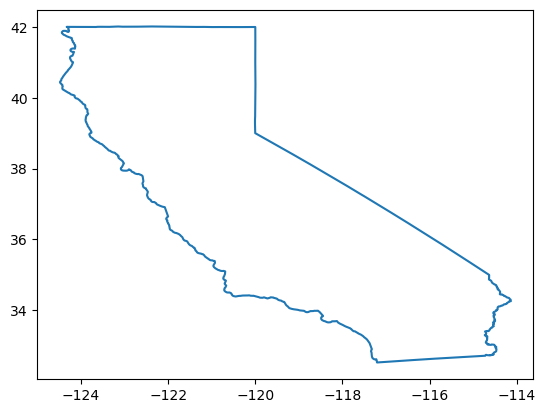

In [151]:
pl.plot(*CA_polygon.exterior.xy)
pl.scatter(bad_city_lngs,bad_city_lats,color='red',s=2)

In [152]:
CA_data_bad_city = CA_data.copy()
CA_data_bad_city.loc[bad_city_rows,'Solar_farm_present'] = 0
CA_data_bad_city.loc[bad_city_rows,'feature_violated'] = 'min_distance'

In [153]:
loc_to_delete =  np.array([False if type(i)==str else True for i in (CA_data_bad_city['feature_violated'].values)])
loc_to_delete = np.arange(0,len(CA_data_bad_city),1)[loc_to_delete]
CA_data_bad_city.drop(labels=loc_to_delete,axis=0)

,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,...,slope,elevation,feature_violated,solrad_annual,ac_monthly,poa_monthly,solrad_monthly,dc_monthly,ac_annual,min_distance
934,40.437539,-123.975678,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,39.0,ac_annual,4.784442,"[73632.9171857727, 75673.88318434854, 110249.3...","[93.28023105614693, 96.59548343959324, 143.841...","[3.009039711488611, 3.449838694271187, 4.64005...","[77451.71467035527, 79641.17316570015, 115736....",1.302083e+06,306.1149
2397,34.199777,-117.892217,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,20.0,1040.0,elevation,6.253437,"[130547.2893583821, 123067.289653164, 156411.1...","[162.8874785160032, 155.2245481689746, 201.305...","[5.254434790838813, 5.543733863177665, 6.49372...","[136759.7097890025, 128952.8937870924, 164058....",1.754754e+06,16.8018
2398,40.105119,-120.114190,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,1277.0,elevation,5.976368,"[104716.5523415419, 117814.3696120475, 146380....","[126.6265079031579, 143.6848214958905, 183.620...","[4.084726061392189, 5.131600767710375, 5.92323...","[109835.1272197598, 124058.3692302866, 154368....",1.671314e+06,227.5631
2399,40.750405,-121.214390,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,1804.0,elevation,5.958497,"[116599.5461868078, 121118.8690201343, 149989....","[138.6322597621909, 146.1697290237358, 186.856...","[4.472008379425514, 5.220347465133422, 6.02761...","[122483.3594623956, 127839.1952458019, 158385....",1.704248e+06,133.4285
2400,41.513016,-122.228301,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,1349.0,elevation,5.595039,"[93000.04827647719, 105552.9601052251, 133196....","[113.2804297171232, 129.5850060340228, 167.728...","[3.654207410229782, 4.628035929786527, 5.41061...","[97559.32021096644, 110696.9870821123, 139570....",1.562365e+06,135.0654
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,37.289327,-119.898464,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,366.0,land_cover,5.867103,"[95328.95100877596, 108990.8799538894, 140092....","[118.9577276791649, 138.2276947748351, 180.570...","[3.837346054166609, 4.936703384815538, 5.82486...","[100087.7899723757, 114182.1553155137, 146825....",1.613157e+06,51.3515
4996,37.739071,-123.091203,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,land_cover,4.769962,"[98227.38502469758, 98822.17157712391, 129850....","[118.3652248845635, 120.7404967134668, 160.861...","[3.81823306079237, 4.312160596909529, 5.189078...","[102995.0341308273, 103710.1192841655, 136314....",1.399526e+06,94.2834
4997,41.825881,-124.428701,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,land_cover,4.515692,"[70004.71455549274, 81380.2869646436, 111258.6...","[85.00729048931791, 99.2293882865231, 137.4604...","[2.742170660945739, 3.543906724518682, 4.43420...","[73699.77919700817, 85539.98772560337, 116804....",1.309439e+06,350.9723
4998,37.680409,-122.551889,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,land_cover,4.833776,"[97087.35930445357, 100718.8764699389, 131161....","[117.8435888861197, 123.3396122809835, 163.353...","[3.801406093100635, 4.404986152892268, 5.26946...","[101818.921886468, 105641.3434799164, 137531.3...",1.404255e+06,8.4849


In [154]:
len(loc_to_delete)

2599

In [155]:
CA_data_bad_city.to_csv(filename_after_threshold)

### Analyzing dataset (ignore this if only adding city data)

In [244]:
test = pd.read_csv('../data/ca_data_version_15.csv')
CA_data = test.loc[test['State']=='CA']

In [245]:
CA_data['elevation']

0       354.0
1       446.0
2       139.0
3        10.0
4        54.0
        ...  
4995      0.0
4996    -70.0
4997    798.0
4998     49.0
4999      0.0
Name: elevation, Length: 5000, dtype: float64

In [246]:
lats = CA_data['Latitude'].values.copy()
lngs = CA_data['Longitude'].values.copy()
lats_solar_farm = CA_data.loc[CA_data['power']>0.01]['Latitude'].values.copy()
lngs_solar_farm = CA_data.loc[CA_data['power']>0.01]['Longitude'].values.copy()
lats_grid = CA_data.loc[np.isnan(CA_data['panel.area'])]['Latitude'].values.copy()
lngs_grid = CA_data.loc[np.isnan(CA_data['panel.area'])]['Longitude'].values.copy()

lats_solor_farm_present = CA_data.loc[CA_data['Solar_farm_present']==1]['Latitude'].values.copy()
lngs_solor_farm_present = CA_data.loc[CA_data['Solar_farm_present']==1]['Longitude'].values.copy()

lats_no_solor_farm = CA_data.loc[CA_data['Solar_farm_present']==0]['Latitude'].values.copy()
lngs_no_solor_farm = CA_data.loc[CA_data['Solar_farm_present']==0]['Longitude'].values.copy()

In [247]:
slopes = CA_data['slope'].values.copy()
elevations = CA_data['elevation'].values.copy()
distance = CA_data['min_distance'].values.copy()

In [248]:
len(lats_solar_farm)

154

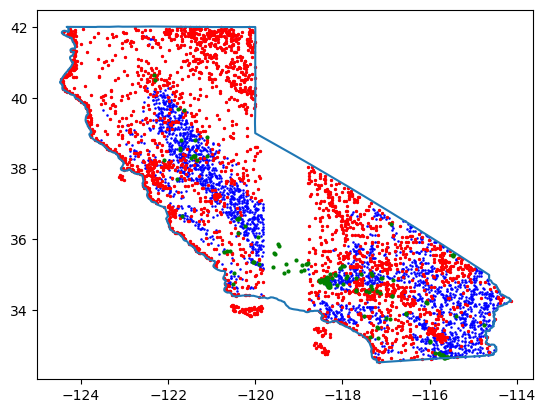

In [251]:
pl.plot(*CA_polygon.exterior.xy)
pl.scatter(lngs_grid,lats_grid,color='blue',s=0.7)
pl.scatter(lngs_no_solor_farm,lats_no_solor_farm,color='red',s=2)
pl.scatter(lngs_solar_farm,lats_solar_farm,color='green',s=4)

In [252]:
cities_distance = CA_data['min_distance'].values.copy()
cities_distance_solar_farms = CA_data.loc[CA_data['power']>0.5]['min_distance'].values.copy()
cities_distance_grid = CA_data.loc[np.isnan(CA_data['panel.area'])]['min_distance'].values.copy()

In [253]:
np.any(np.isnan(cities_distance))

True

In [229]:


temp = CA_data.loc[(CA_data['elevation']<1500) * (CA_data['slope']<20) * (CA_data['land_cover']!=0)  * (CA_data['solrad_annual']>3.0)]
cities_distance_2 = temp['min_distance'].values.copy()
# len(cities_distance_2)
np.sum((cities_distance_2>100))

1442

In [255]:
# thresholds
solar_slopes = CA_data.loc[CA_data['Solar_farm_present']==1]['slope'].values.copy()
solor_elevations = CA_data.loc[CA_data['Solar_farm_present']==1]['elevation'].values.copy()
solar_distance = CA_data.loc[CA_data['Solar_farm_present']==1]['min_distance'].values.copy()
solar_ac_annual = CA_data.loc[CA_data['Solar_farm_present']==1]['ac_annual'].values.copy()

slope_threshold = np.percentile(solar_slopes,90)
elevations_threshold = np.percentile(solor_elevations,90)
distance_threshold = np.percentile(solar_distance,90)
ac_threshold = np.percentile(solar_ac_annual,10)

In [256]:
slope_threshold,elevations_threshold,distance_threshold,ac_threshold

(3.0, 859.4000000000001, 91.93304, 1628241.293689716)

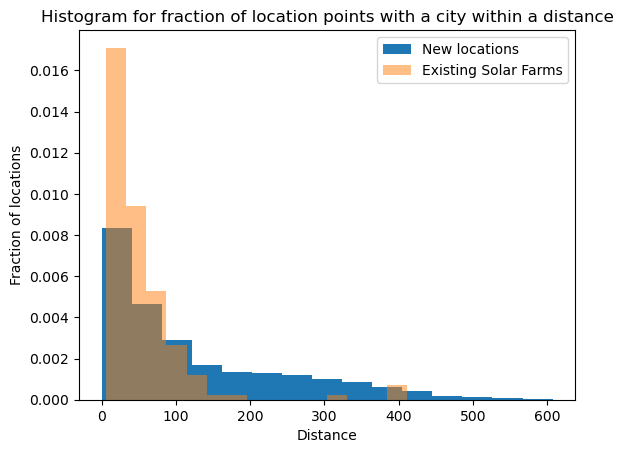

In [257]:
pl.hist(cities_distance,bins=15,density=True,label='New locations')
pl.hist(cities_distance_solar_farms,bins=15,density=True,alpha=0.5,label='Existing Solar Farms')
pl.title('Histogram for fraction of location points with a city within a distance')
pl.xlabel('Distance')
pl.ylabel('Fraction of locations')
pl.legend()

In [259]:
cities_lat = cities['lat'].values.copy()
cities_lng = cities['lng'].values.copy()

Text(0.5, 1.0, 'Cities with min. population 88000 in CA')

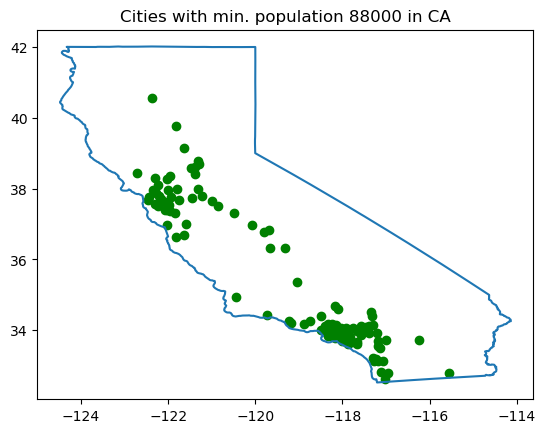

In [260]:
pl.plot(*CA_polygon.exterior.xy)
pl.scatter(cities_lng,cities_lat,color='green')
pl.title('Cities with min. population 88000 in CA')

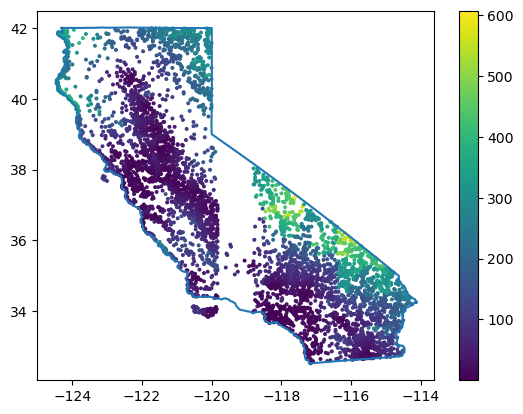

In [261]:
pl.plot(*CA_polygon.exterior.xy) 
max_dist = np.max(cities_distance)
cities_distance_grid[np.isnan(cities_distance_grid)]=500
# pl.tricontour(lngs[:],lats[:],cities_distance[:])
sc = pl.scatter(lngs,lats,c=distance,s= 3.5)
pl.colorbar(sc)


### Putting thresholds